**Содержание темы**

1. [Теория](https://colab.research.google.com/drive/1i7yg4JvtG_L24T_2VPVTTWlXWrRdgvqQ?usp=sharing)

2. Практический ноутбук 1

3. [Практический ноутбук 2](https://colab.research.google.com/drive/1xnH8OUXgWk9D2zAZsLMAjxsQx8ejmrsz?usp=sharing)


Сегодня на практике изучим вопрос корреляции временных рядов, выполним две задачи по прогнозированию стоимости акций «Лукойла» и предскажем тренд по акциям Сбербанка (задача классификации: рост или падение).

# Обработка временных рядов с помощью нейронных сетей

## Понятие автокорреляции

Импортируем необходимые библиотеки:

In [ ]:
# Работа с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Визуальные инструменты Seaborn
import seaborn as sns
sns.set_style('darkgrid')

Опишем основные параметры для построения графиков:

In [ ]:
# Назначение размера и стиля графиков по умолчанию
from pylab import rcParams
plt.style.use('ggplot')
rcParams['figure.figsize'] = (14, 7)

Создадим временной ряд, состоящий из 16 значений:

In [ ]:
# Создание модельного временного ряда
test_series = [
    5.6, 4.7, 5.2, 9.1,
    7.1, 5.1, 6.1, 9.2,
    8.2, 5.6, 6.4, 9.5,
    9.1, 6.7, 7.5, 9.9
    ]

Выведем временной ряд на графике:

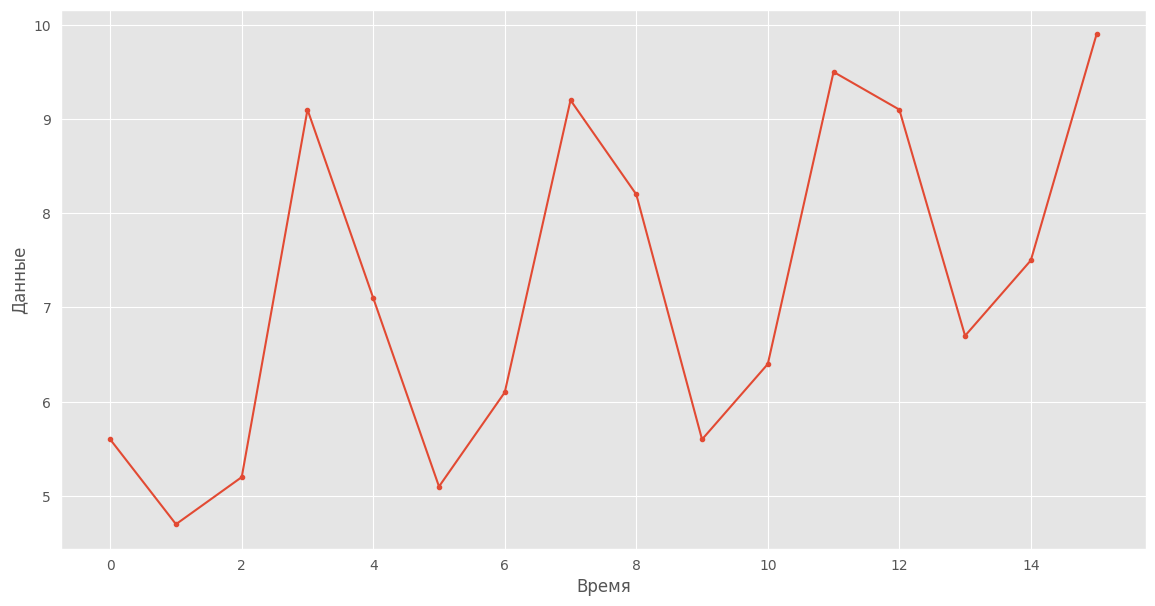

In [ ]:
# Рисование графика временного ряда
plt.plot(test_series, marker='.')
plt.xlabel('Время')
plt.ylabel('Данные')
plt.show()

Посчитаем коэффициент автокорреляции. Не забываем, что автокорреляция – это то, насколько два графика похожи друг на друга. Формула коэффициента написана ниже. Для лучшего усвоения разберем ее на практике.

***Коэффициент автокорреляции Пирсона***

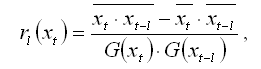

Создадим две переменные:
- x_t – базовый (текущий) временной ряд;
- x_t_1 – базовый временной ряд, но смещенный на 1 шаг вправо.

In [ ]:
# Исходный временной ряд
x_t = test_series
# Получение смещенного на один шаг временного ряда
x_t_1 = [0.] + test_series[:-1]

print('Исходный: ', x_t)
print('Со свигом:', x_t_1)

Исходный:  [5.6, 4.7, 5.2, 9.1, 7.1, 5.1, 6.1, 9.2, 8.2, 5.6, 6.4, 9.5, 9.1, 6.7, 7.5, 9.9]
Со свигом: [0.0, 5.6, 4.7, 5.2, 9.1, 7.1, 5.1, 6.1, 9.2, 8.2, 5.6, 6.4, 9.5, 9.1, 6.7, 7.5]


Переведем данные в Numpy, так как с ним проще считать:

In [ ]:
# Получение общей части обоих рядов удалением нулевого элемента исходного ряда и последнего элемента смещенного
x_t_np = np.array(x_t[1:])
x_t_1_np = np.array(x_t[:-1])

print(x_t_np)
print(x_t_1_np)

[4.7 5.2 9.1 7.1 5.1 6.1 9.2 8.2 5.6 6.4 9.5 9.1 6.7 7.5 9.9]
[5.6 4.7 5.2 9.1 7.1 5.1 6.1 9.2 8.2 5.6 6.4 9.5 9.1 6.7 7.5]


Отрисуем оба временных ряда на графике:

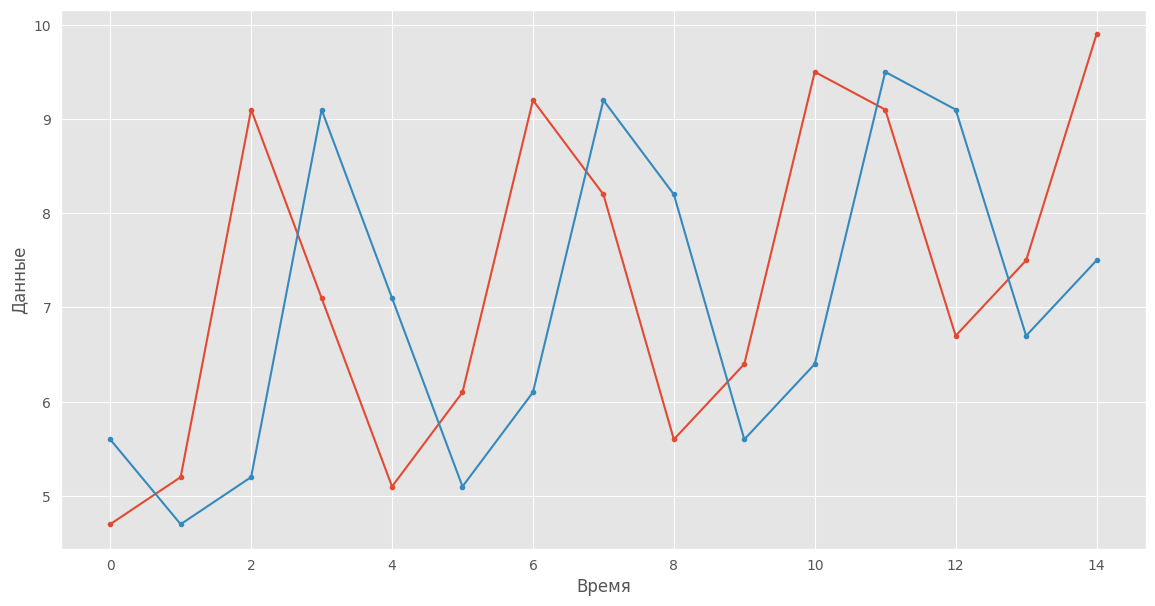

In [ ]:
# Рисование совместного графика исходного и смещенного временных рядов
plt.plot(x_t_np, marker='.')
plt.plot(x_t_1_np, marker='.')
plt.xlabel('Время')
plt.ylabel('Данные')
plt.show()

А теперь вручную посчитаемкоэффициент корреляции:
- m12 – поэлементно перемножим оба графика и возьмем среднее значение;
- m1 и m2 – получим среднее значение обоих графиков по отдельности;
- s1 и s2 – посчитаем среднеквадратичное отклонение обоих графиков по отдельности;
- k – посчитаем полученные значения по формуле.

Выведем полученные данные на экран.


In [ ]:
# Расчет коэффициента автокорреляции Пирсона вручную
m12 = (x_t_np * x_t_1_np).mean()          # Мат. ожидание от произведения двух временных рядов
m1 = x_t_np.mean()                        # Мат. ожидание исходного временного ряда
m2 = x_t_1_np.mean()                      # Мат. ожидание смещенного временного ряда
s1 = x_t_np.std()                         # Среднеквадратическое отклонение (СКО) исходного временного ряда
s2 = x_t_1_np.std()                       # СКО смещенного временного ряда
k = (m12 - m1*m2) / (s1 * s2)             # Коэффициент автокорреляции исходного ряда при смещении на один шаг

print('Мат. ожидание произведения двух рядов: {:.2f}'.format(m12))
print('Мат. ожидание первого ряда: {:.2f}'.format(m1))
print('Мат. ожидание второго ряда: {:.2f}'.format(m2))
print('СКО первого ряда: {:.2f}'.format(s1))
print('СКО второго ряда: {:.2f}'.format(s2))
print('Коэффициент автокорреляции при смещении на 1 шаг: {:.4f}'.format(k))

Мат. ожидание произведения двух рядов: 51.74
Мат. ожидание первого ряда: 7.29
Мат. ожидание второго ряда: 7.01
СКО первого ряда: 1.71
СКО второго ряда: 1.61
Коэффициент автокорреляции при смещении на 1 шаг: 0.2298


Коэффициент получился 0,23. При том, что графики похожи, их значения далеки друг от друга.

Считать вручную, конечно, полезно для запоминания и усвоения материала, но в работе нужны более быстрые способы. При помощи np.corrcoef() получим тот же результат, но всего в одну строку и без запоминания формулы:

In [ ]:
# Способ получить коэффициент автокорреляции встроенными средствами numpy
np.corrcoef(x_t_np, x_t_1_np)

array([[1.       , 0.2298064],
       [0.2298064, 1.       ]])

Напишем функцию, которая посчитает коэффициент при любом смещении:
- data – базовый временной ряд;
- back_steps – количество шагов смещения.


In [ ]:
# Функция вычисления коэффициента автокорреляции

def get_corr_coef(data, # данные
                  back_steps): #  шаг смещения >= 0

    # Получение общих частей исходного и смещенного на back_steps рядов,
    # затем вычисление матрицы коэффициентов и отбор коэффициента из нужного места матрицы
    return np.corrcoef(data[back_steps:], data[:len(data) - back_steps])[0, 1]

Проверим работу функции на смещении базового ряда на 1, получим тот же результат:

In [ ]:
# Вычисление и печать коэффициента корреляции
print('{:.4f}'.format(get_corr_coef(test_series, 1)))

0.2298


Пропишем функцию отрисовки графика автокорреляции. На вход подадим временной ряд и максимальное количество шагов смещения для графика:

In [ ]:
# Функция рисования графика коэффициентов автокорреляции данных на разных шагах смещения

def autocorr_graph(data, steps_max):
    # Задание последовательности шагов смещения от 0 до steps_max
    # и расчет коэффициентов автокорреляции для этих смещений
    steps = range(0, steps_max + 1)
    coefs = [get_corr_coef(data, i) for i in steps]

    # Рисование графика коэффициентов автокорреляции
    plt.plot(steps, coefs)
    plt.xticks(steps)
    plt.xlabel('Шаги смещения')
    plt.ylabel('Коэффициент автокорреляции')
    plt.show()

Выведем результат работы функции на 10 шагах для базового временного ряда:

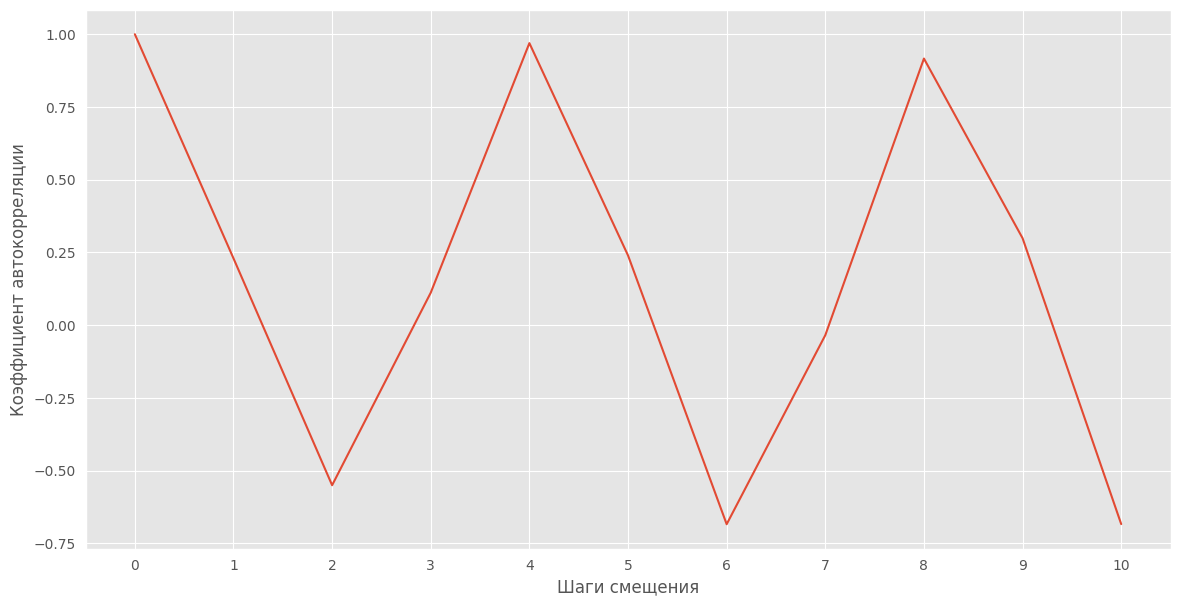

In [ ]:
# График коэффициентов автокорреляции
autocorr_graph(test_series, 10)

График начинается с 1, так как первый расчет сделан без смещения. То есть автокорреляция базового ряда самого к себе.

Вершины графика показывают, что если сместить график на четыре или восемь шагов, то он останется практически таким же. Смещение на 3, 5, 7 показывает, что графики максимально различны. 2, 6, 10 – графики противоположны:


Опишем функцию, которая сместит график на нужное количество шагов и отрисует его:

In [ ]:
# Функция иллюстрации смещения на заданное число шагов

def show_skew(data, back_steps):
    # Построение и вывод общих частей исходного и смещенного рядов
    x_t = data[back_steps:]
    x_t_b = data[:len(data) - back_steps]

    print('Шаги смещения: {}, коэф. автокорреляции: {:.4f}'.format(back_steps,
                                                                   get_corr_coef(data, back_steps)))
    print(x_t)
    print(x_t_b)

    # Рисование совместного графика исходного и смещенного временных рядов
    plt.plot(x_t, marker='.', label='Основной ряд')
    plt.plot(x_t_b, marker='.', label='Смещенный ряд')
    plt.xlabel('Время')
    plt.ylabel('Данные')
    plt.legend()
    plt.show()

Шаги смещения: 4, коэф. автокорреляции: 0.9694
[7.1, 5.1, 6.1, 9.2, 8.2, 5.6, 6.4, 9.5, 9.1, 6.7, 7.5, 9.9]
[5.6, 4.7, 5.2, 9.1, 7.1, 5.1, 6.1, 9.2, 8.2, 5.6, 6.4, 9.5]


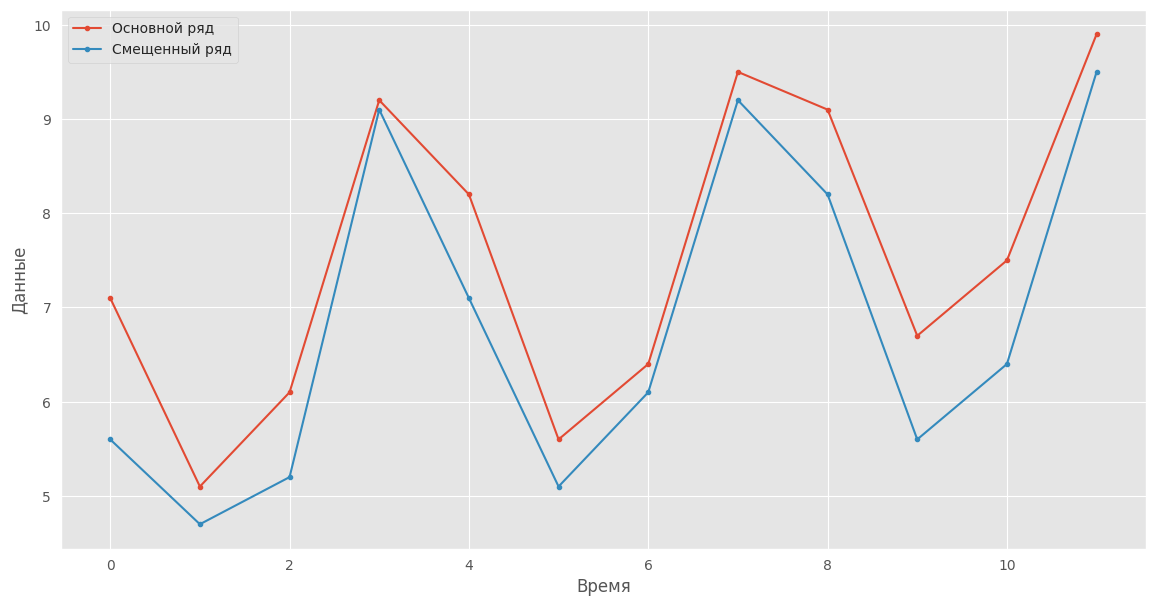

In [ ]:
# Иллюстрация смещения
show_skew(test_series, 4)

Шаги смещения: 3, коэф. автокорреляции: 0.1118
[9.1, 7.1, 5.1, 6.1, 9.2, 8.2, 5.6, 6.4, 9.5, 9.1, 6.7, 7.5, 9.9]
[5.6, 4.7, 5.2, 9.1, 7.1, 5.1, 6.1, 9.2, 8.2, 5.6, 6.4, 9.5, 9.1]


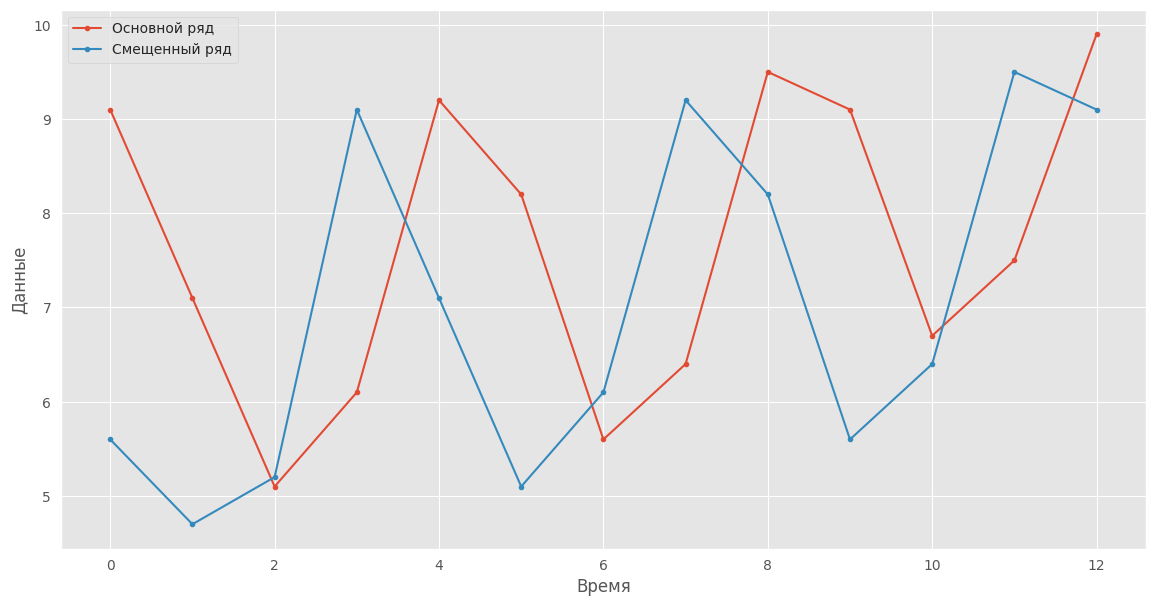

In [ ]:
# Иллюстрация смещения
show_skew(test_series, 3)

Шаги смещения: 6, коэф. автокорреляции: -0.6839
[6.1, 9.2, 8.2, 5.6, 6.4, 9.5, 9.1, 6.7, 7.5, 9.9]
[5.6, 4.7, 5.2, 9.1, 7.1, 5.1, 6.1, 9.2, 8.2, 5.6]


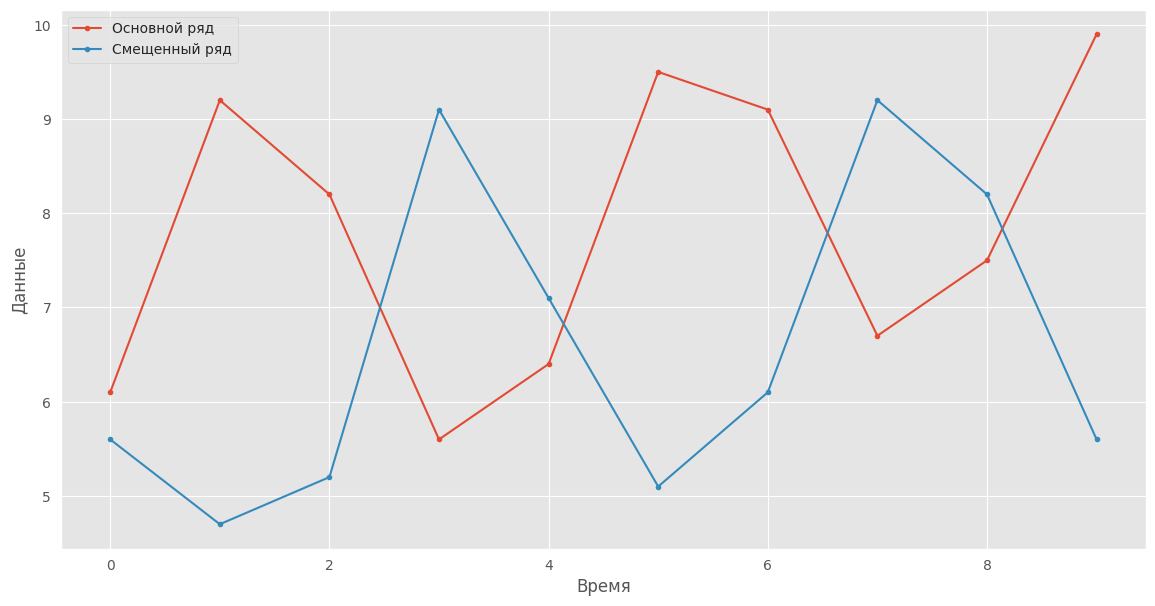

In [ ]:
# Иллюстрация смещения
show_skew(test_series, 6)

Как видим, графики очень похожи при сдвиге базового ряда на четыре шага. Остальные графики подтверждают результаты автокорреляции.

---

**Важно**: смотрим не на то, что графики похожи, а на то, насколько данные различны в определенное время.

---

В любом временном ряду может наблюдаться тренд – основная тенденция изменения временного ряда. Посмотрим, как он может влиять на автокорреляцию.


## Влияние тренда

Отрисуем случайно созданный временной ряд из 30 значений:

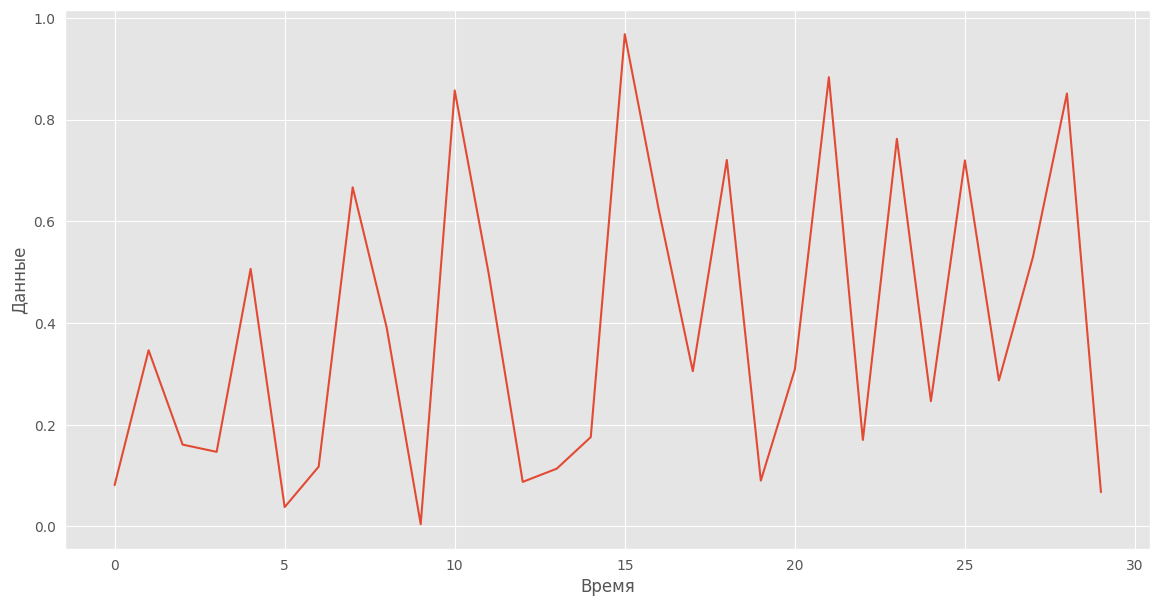

In [ ]:
# В качестве модельного ряда используется несколько случайных значений
random_series = np.random.rand(30)

# Построение графика ряда
plt.plot(random_series)
plt.xlabel('Время')
plt.ylabel('Данные')
plt.show()

Посчитаем коэффициент для смещения в один шаг. Он значительно меньше 1, что говорит о незначительной корреляции между данными, которые использовались для построения графиков.

In [ ]:
# Коэффициент автокорреляции при смещении на 1 шаг
get_corr_coef(random_series, 1)

np.float64(-0.2283057753237208)

Построим график автокорреляции для временного ряда. Как видим, практически при любом смещении график не коррелируется сам с собой:

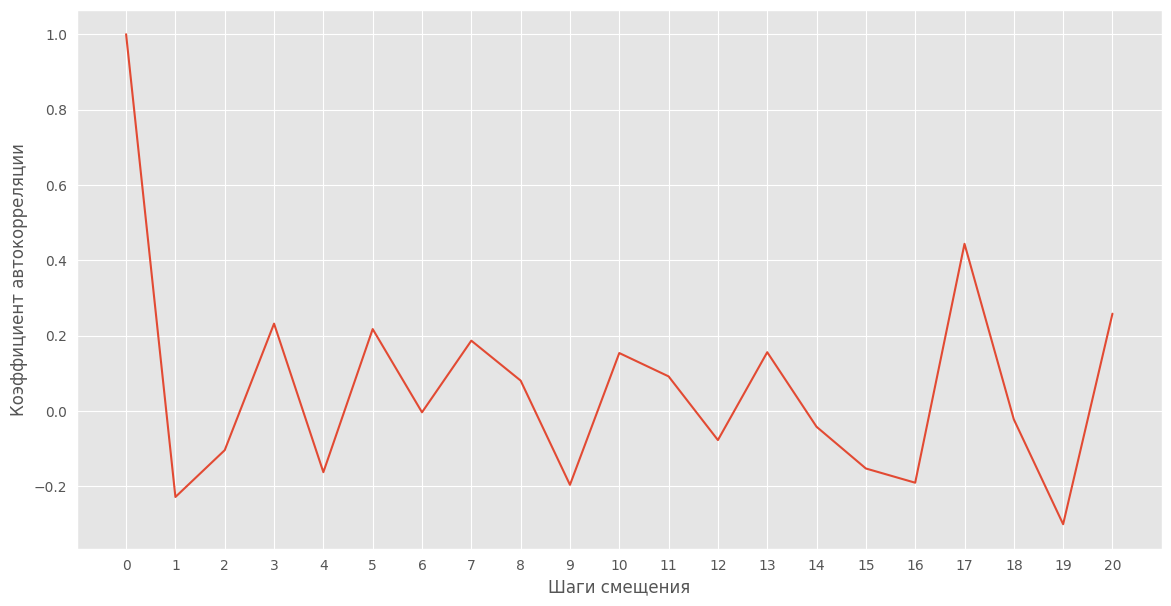

In [ ]:
# График коэффициентов автокорреляции модельного ряда
autocorr_graph(random_series, 20)

Изменим базовый ряд, чтобы появился растущий тренд:

**np.linspace()** возвращает одномерный массив из указанного количества элементов, значения которых равномерно распределены внутри заданного интервала. Его параметры:
- start – число в начале последовательности.
- stop – число в конце последовательности, если `endpoint=True`. Если `endpoint=False`, то это число не включается в интервал. При этом изменяется значение шага между элементами последовательности.
- num – целое положительное число (не обязательный параметр). Определяет количество элементов последовательности. По умолчанию `num = 50`.
- endpoint – True или False (не обязательный параметр). Если `endpoint = True`, то значение stop включается в интервал и становится последним. В противном случае stop не входит в интервал. По умолчанию `endpoint = True`.


In [ ]:
# Генерация шума в виде линейно возрастающего тренда
# Величина шума большая по сравнению с величиной элементов модельного ряда
trend = np.linspace(0., 5., random_series.shape[0])

# Получение искаженного ряда сложением основного ряда и тренда (шума)
trended_series = random_series + trend

# Проверка результата
print(trend)
print()
print(trended_series)

[0.         0.17241379 0.34482759 0.51724138 0.68965517 0.86206897
 1.03448276 1.20689655 1.37931034 1.55172414 1.72413793 1.89655172
 2.06896552 2.24137931 2.4137931  2.5862069  2.75862069 2.93103448
 3.10344828 3.27586207 3.44827586 3.62068966 3.79310345 3.96551724
 4.13793103 4.31034483 4.48275862 4.65517241 4.82758621 5.        ]

[0.08116794 0.5188772  0.50574342 0.66391611 1.19616943 0.90005207
 1.15204188 1.87392898 1.7702852  1.55604166 2.58158206 2.39338277
 2.15656016 2.35497503 2.58949033 3.55434384 3.38128484 3.23631565
 3.82421552 3.36591546 3.75716802 4.50429013 3.96321193 4.72785276
 4.38432963 5.03029307 4.77002117 5.18503825 5.67898886 5.06742214]


Выведем его на экран:

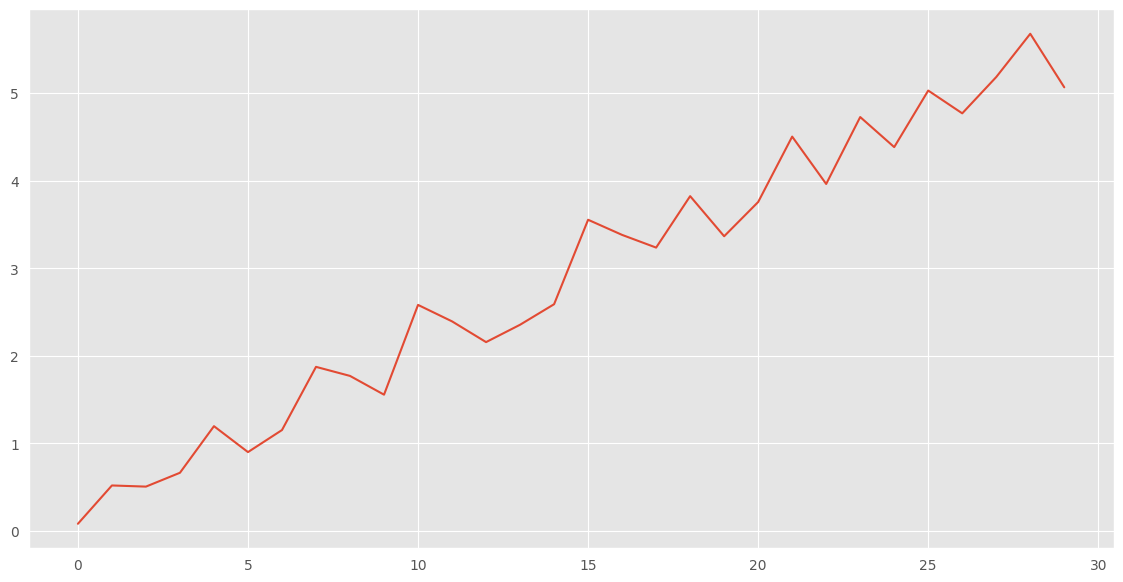

In [ ]:
# Рисование графика полученного ряда с трендом
plt.plot(trended_series)
plt.show()

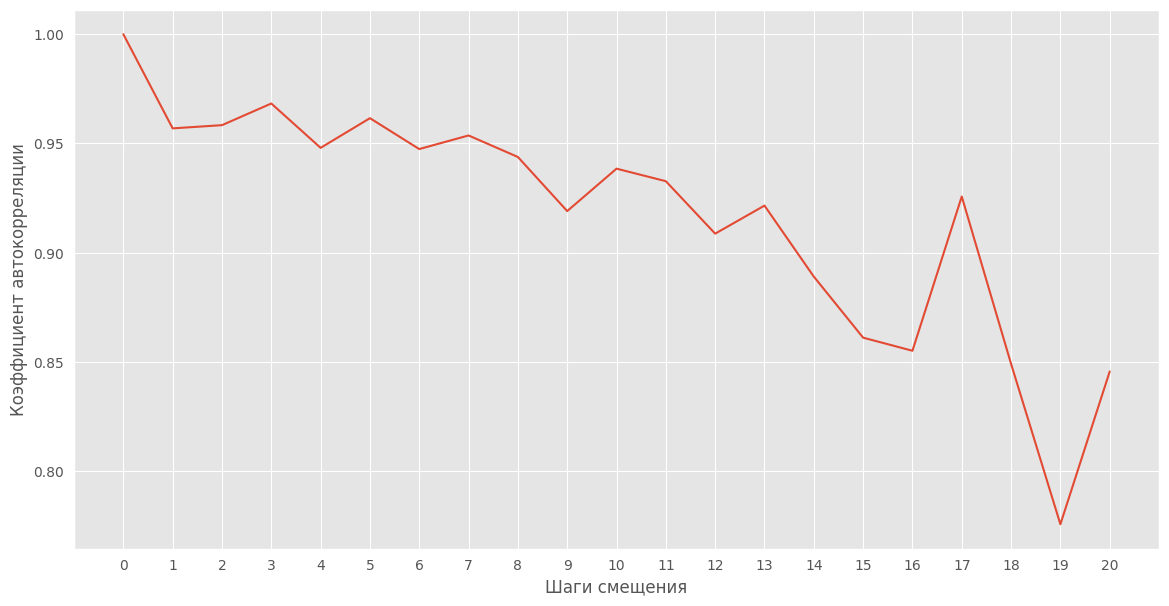

In [ ]:
# График коэффициентов автокорреляции искаженного ряда
autocorr_graph(trended_series, 20)



---


**Вывод**: наложенный тренд может существенно исказить корреляционные показатели исходных данных. Его влияние тем хуже, чем больше величина элементов тренда по сравнению с величиной элементов исходного ряда.

---



Тренд отрицательно влияет на коэффициент автокорреляции. Посмотрим, как при помощи дифференцирования можно убрать его влияние на данные.

Дифференцирование данных – это вычитание текущего значения из следующего. Например, для графика

        [5, 7, 8, 3, 6, 2, 1]

результат дифференцирования – ряд:

         [2, 1, -5, 3, -4, -1]
         т.к. 7-5=2, 8-7=1, ..., 1-2=-1
         
Применим операцию к нашим данным:


## Метод избавления от влияния тренда: численное дифференцирование временных рядов

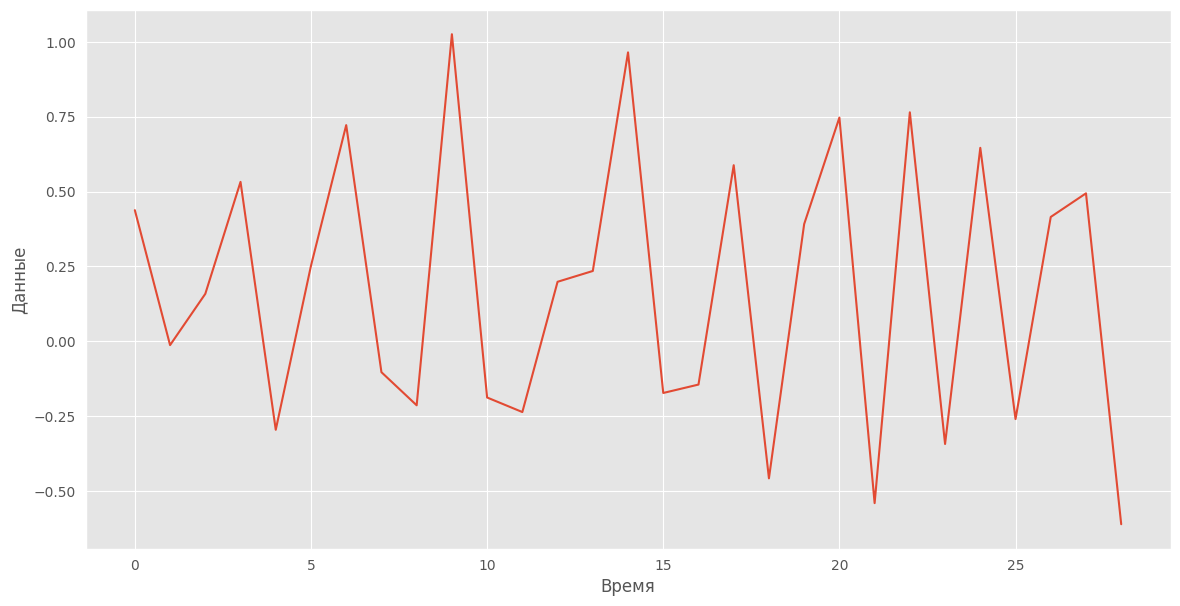

In [ ]:
# Численное дифференцирование искаженного ряда
trended_series_diff = np.diff(trended_series)

# Построение графика полученного ряда
plt.plot(trended_series_diff)
plt.xlabel('Время')
plt.ylabel('Данные')
plt.show()

Теперь на графике нет тренда

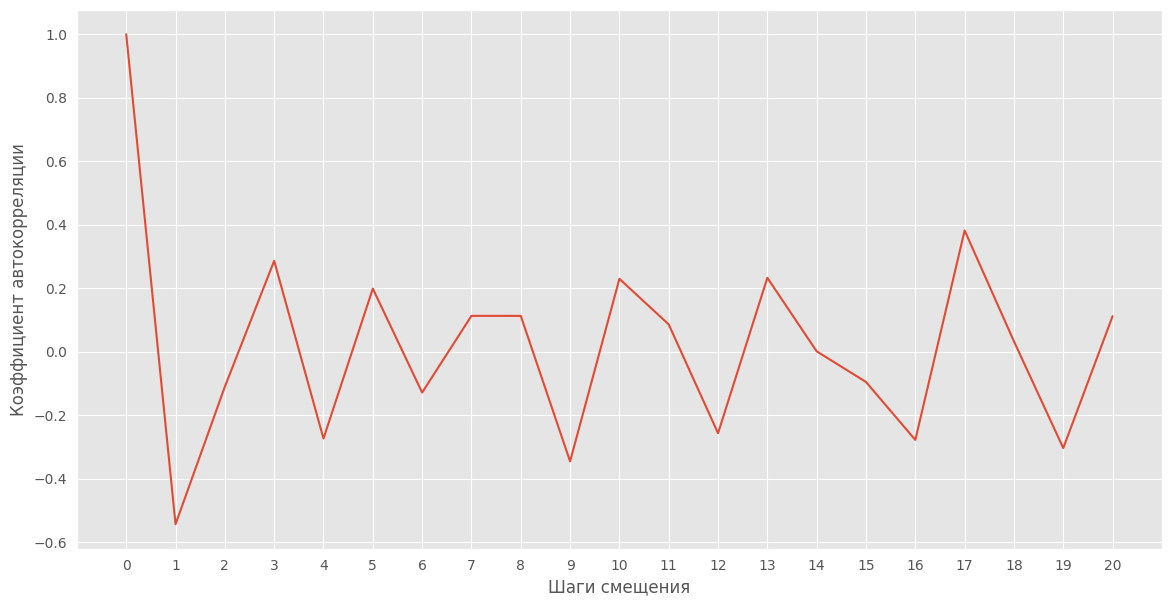

In [ ]:
# График коэффициентов автокорреляции дифференцированного ряда
autocorr_graph(trended_series_diff, 20)

График автокорреляции тоже изменился и практически вернулся к виду исходного графика корреляции.

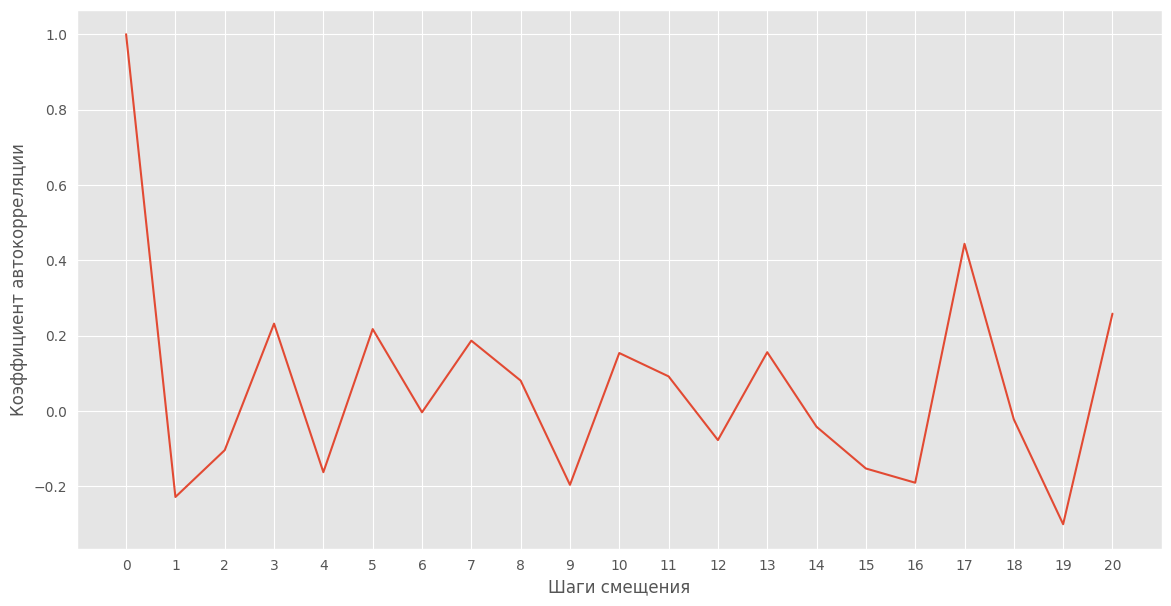

In [ ]:
# Сравнение с графиком коэффициентов автокорреляции исходного ряда
autocorr_graph(random_series, 20)



---


**Вывод**: численное дифференцирование позволяет избавиться от влияния тренда на корреляционные показатели исходного ряда.

---



---



Теперь, когда мы знаем, как проявляет себя автокорреляция и как с ней бороться, можем решать практические задачи.

#Задача: Прогнозирование курса акций Лукойл




##Загрузка библиотек

Загрузим библиотеки из нового TimeseriesGenerator и RepeatVector. Рассмотрим их подробнее уже при применении:

In [ ]:
# Работа с массивами
import numpy as np

# Работа с таблицами
import pandas as pd

# Классы-конструкторы моделей нейронных сетей
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Генератор выборки временных рядов
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Нормировщики
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Загрузка датасетов из облака google
import gdown

# Отрисовка графиков
import matplotlib.pyplot as plt

# Отрисовка графики в ячейке colab
%matplotlib inline

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

Опишем параметры вывода графиков:

In [ ]:
# Назначение размера и стиля графиков по умолчанию
from pylab import rcParams
plt.style.use('ggplot')
rcParams['figure.figsize'] = (14, 7)

##Загрузка датасета и подготовка данных

###Загрузка данных

Загрузим данные акций за 16-17 года и 18-19 года:

In [ ]:
# Загрузка датасетов из облака
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l11/16_17.csv', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l11/18_19.csv', None, quiet=True)

'18_19.csv'

Переведем данные в DataFrame:

In [ ]:
# Чтение данных в таблицу pandas
base_data = pd.read_csv('18_19.csv', sep=';')

Посмотрим содержимое таблицы и выведем пример нулевой строки:

In [ ]:
# Вывод первых строк таблицы
base_data.head()

,DATE,TIME,OPEN,MAX,MIN,CLOSE,VOLUME
0,03.01.2018,10:00:00,3341.0,3356.0,3340.0,3355.0,6088
1,03.01.2018,10:01:00,3355.0,3359.0,3353.0,3353.0,1624
2,03.01.2018,10:02:00,3351.5,3357.5,3351.5,3357.5,722
3,03.01.2018,10:03:00,3354.5,3360.0,3354.5,3358.0,3034
4,03.01.2018,10:04:00,3358.0,3360.0,3351.5,3360.0,1427


Изучив содержимое таблиц, снова их подгрузим, но уже сразу удалим ненужные столбцы по дате и времени:

In [ ]:
# Пример данных из нулевой строки
print(base_data.values[0])

['03.01.2018' '10:00:00' 3341.0 3356.0 3340.0 3355.0 6088]


In [ ]:
# Чтение данных в таблицы с удалением ненужных столбцов
data16_17 = pd.read_csv('16_17.csv', sep=';').drop(columns=['DATE', 'TIME'])
data18_19 = pd.read_csv('18_19.csv', sep=';').drop(columns=['DATE', 'TIME'])

Посмотрим размерность получившейся таблицы:

In [ ]:
# Проверка формы данных
data16_17.shape

(263925, 5)

Объединим таблицы в одну общую:

In [ ]:
# Пример данных одного датасета
d = data18_19

print(d.shape[0])                         # Всего записей (строк)
print(d.shape[1])                         # Количество столбцов
print(d.iloc[0])                          # Пример нулевой строки данных

217947
5
OPEN      3341.0
MAX       3356.0
MIN       3340.0
CLOSE     3355.0
VOLUME    6088.0
Name: 0, dtype: float64


In [ ]:
# Создание общего набора данных из двух датасетов
data = pd.concat([data16_17, data18_19]).to_numpy()

Посмотрим размерность новой таблицы:

In [ ]:
# Проверка формы данных
print(data16_17.shape)
print(data18_19.shape)
print(data.shape)

(263925, 5)
(217947, 5)
(481872, 5)


Почти полмиллиона записей.

Создадим словарь из названия столбцов и выведем его на экран:

In [ ]:
# Задание текстовых меток каналов данных (столбцов)
CHANNEL_NAMES = ['Open', 'Max', 'Min', 'Close', 'Volume']

# Получение словаря с именами и индексами каналов данных
CHANNEL_INDEX = {name: chan for chan, name in enumerate(CHANNEL_NAMES)}
print(CHANNEL_INDEX)

{'Open': 0, 'Max': 1, 'Min': 2, 'Close': 3, 'Volume': 4}


###Иллюстрация данных в графическом виде

Выведем данные для дальнейшей работы. Данные будут отображаться с позиции с номером `start`, длиной `length` отчетов. Отрисуем четыре линии со значениями OPEN, MIN, MAX, CLOSE и гистограммы по объему продаж:


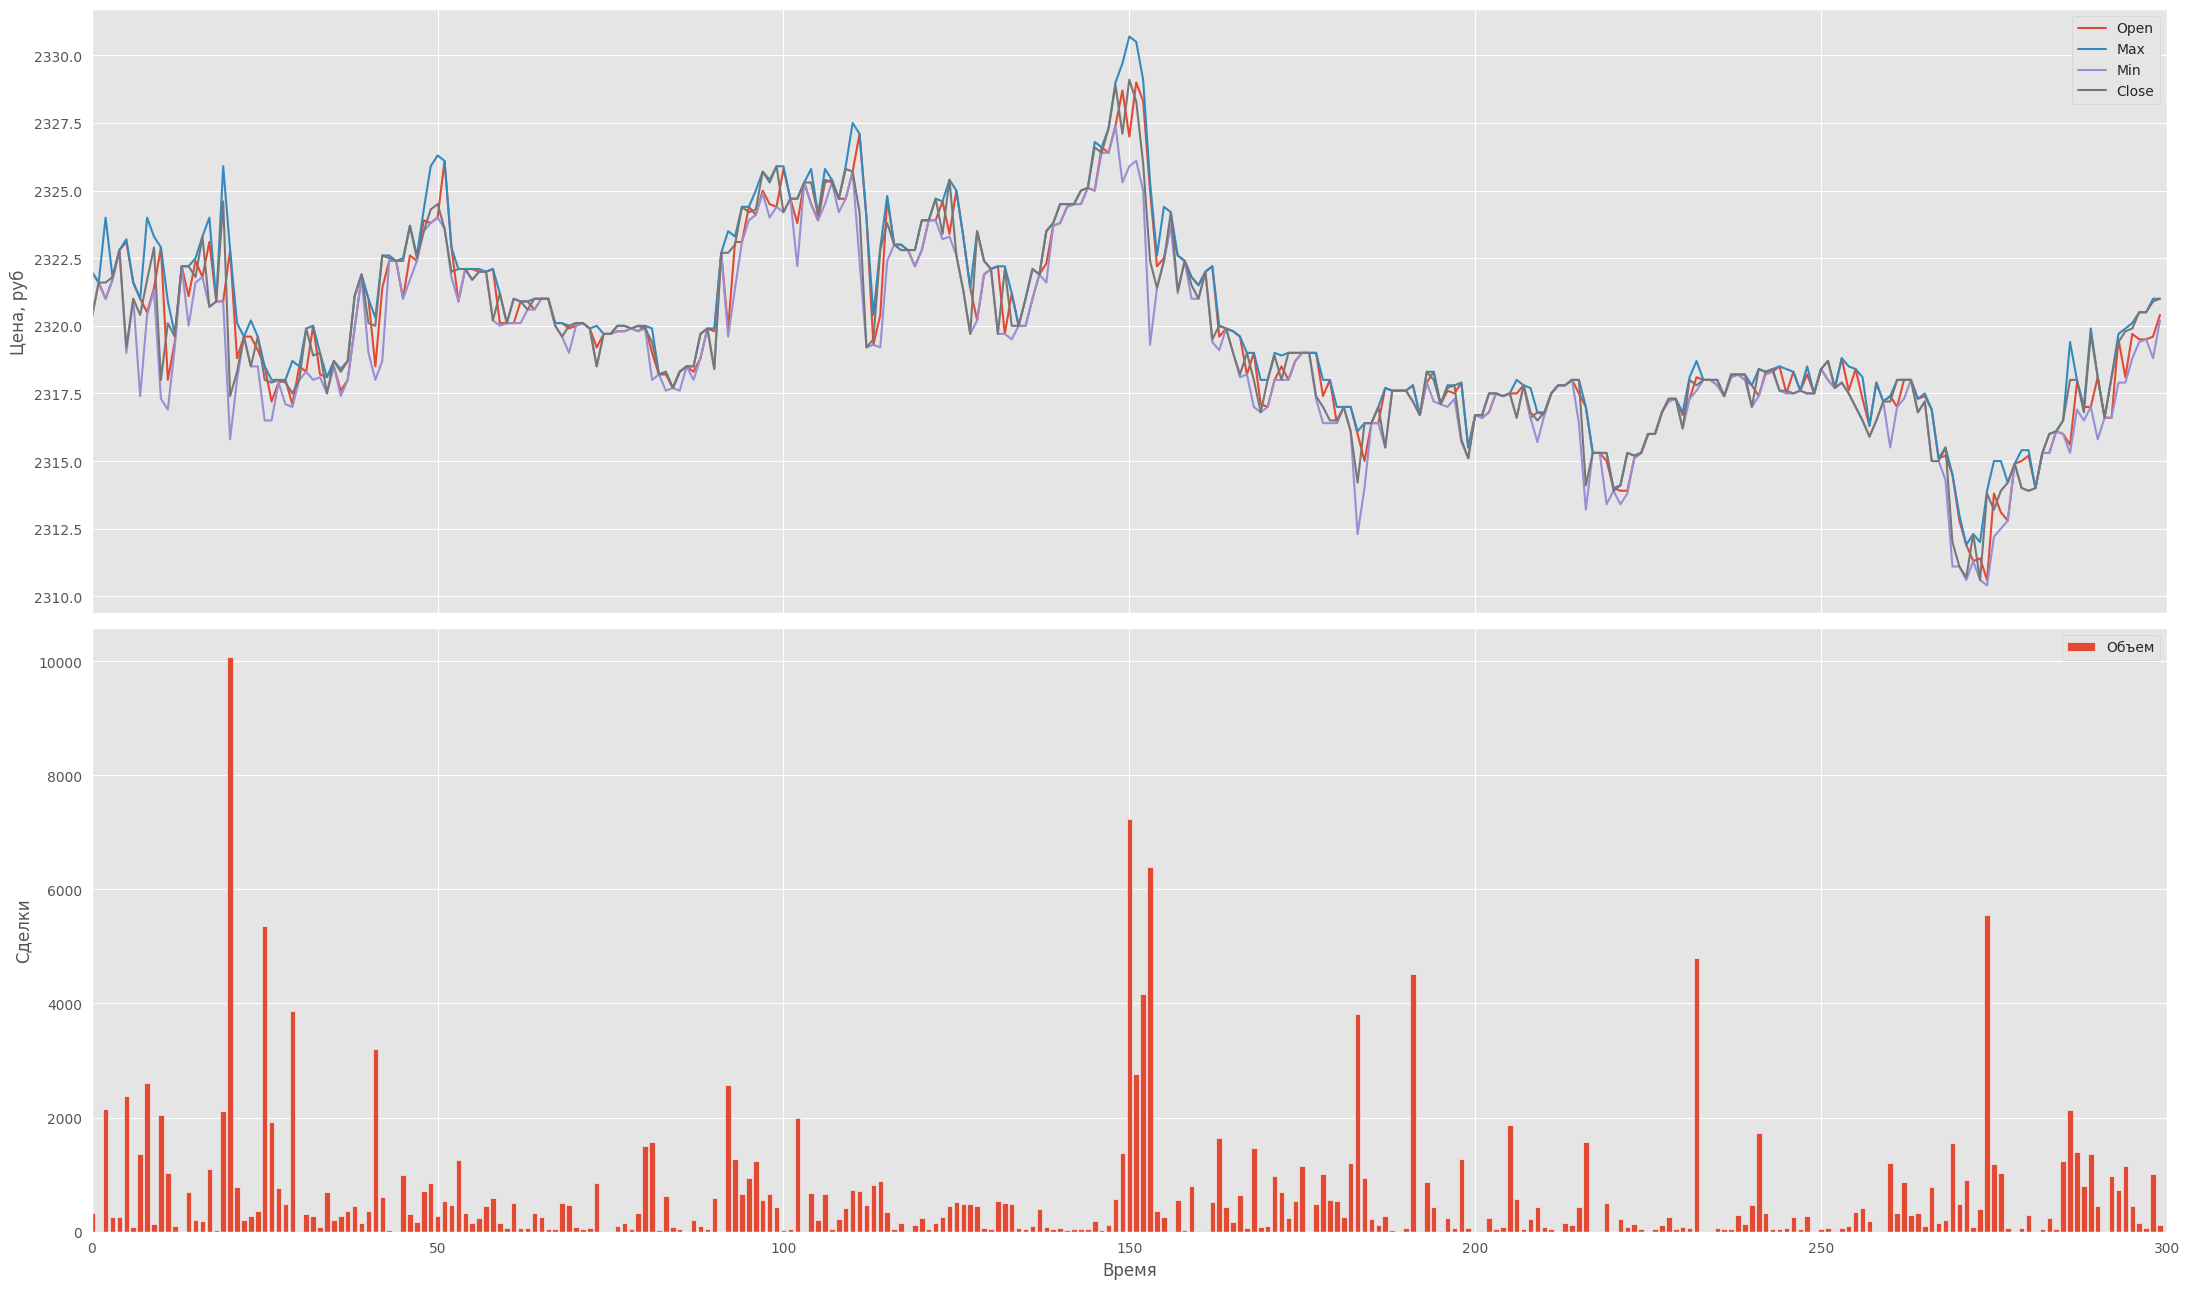

In [ ]:
# Отображение исходных данных от точки start и длиной length
start = 100
length = 300

# Задание полотна для графиков - два подграфика один под другим с общей осью x
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 13), sharex=True)

# Четыре основных канала - open, max, min, close
for chn in range(4):
    # Отрисовка одного канала данных
    # От начальной точки start длиной length
    ax1.plot(data[start:start + length, chn],
             label=CHANNEL_NAMES[chn])
ax1.set_ylabel('Цена, руб')
ax1.legend()

# Канал volume (объем)
ax2.bar(x=np.arange(length),
        height=data[start:start + length, CHANNEL_INDEX['Volume']],
        label='Объем')
ax2.set_ylabel('Сделки')
ax2.legend()

plt.xlabel('Время')
# Регулировка пределов оси x
plt.xlim(0, length)
# Указание расположить подграфики плотнее друг к другу
plt.tight_layout()
# Фиксация графика
plt.show()

Теперь подготовим выборки. Вспомним теорию начала урока. Возьмем 100 элементов в x_train, 101 элемент в y_train и так далее. Чтобы не делать этого вручную, воспользуемся инструментом TimeseriesGenerator.


### Знакомство с **TimeseriesGenerator**

Основные параметры для TimeseriesGenerator:
- x_train – временной ряд, из которого собираются данные.
- y_train – целевые значения. Должны быть той же длины что и x_train.
- length – длина выходных последовательностей, окно, которым вы пройдетесь по данным.
- sampling_rate – размер шага при выборке данных в x_train. Если x_train последовательность от 0 до 50, то при rate=1 последовательность выглядит так:

        [0, 1, 2, 3, 4].
При rate=2 в последовательность попадет каждый второй элемент:

        [0, 2, 4, 6, 8]
и так далее.

- stride – указывает, на сколько элементов произойдет сдвиг при смене элемента. У того же x_train при stride=1 первый и второй элемент выглядят так:
        
        [0, 1, 2, 3, 4, 5] [1, 2, 3, 4, 5, 6].
        
        При stride=2:

        [0, 1, 2, 3, 4, 5] [2, 3, 4, 5, 6, 7].

- batch_size – сколько элементов вернет генератор при обращении к нему.
Теперь, когда основные параметры понятны, перейдите к практике. Для этого опишите функцию с генератором и выводом информации на экран.


In [ ]:
# Функция создания пробного генератора и вывода его результатов на экран
# На входе - имитация выборок x_train, y_train
def show_gen(x_train, y_train, length=10, batch_size=5, stride=1):
    gen = TimeseriesGenerator(x_train, y_train, length=length,
                            sampling_rate=1, stride=stride, batch_size=batch_size)

    # Считаем максимальное количество батчей для цикла
    n_samples = len(x_train)
    max_batches = (n_samples - length) // (stride * batch_size)

    print(f"Всего батчей: {max_batches}\n")

    # Измененный цикл, верный
    for i, g in zip(range(max_batches), gen):
        print('Батч №', i)
        print('x_train:\n', g[0])
        print('y_train:\n', g[1])
        print()

Создадим последовательность от 0 до 50:

In [ ]:
# Создание и вывод модельного массива (последовательность чисел от 0 до 49)
test_array = np.arange(50)
print(test_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


Подадим ее в генератор. Результат работы на экране. В каждый батч входит пять элементов, в y_train – тоже пять элементов:

In [ ]:
# Вывод генератора на модельных выборках
show_gen(test_array, test_array, batch_size=5)

Всего батчей: 8

Батч № 0
x_train:
 [[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]]
y_train:
 [10 11 12 13 14]

Батч № 1
x_train:
 [[ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]]
y_train:
 [15 16 17 18 19]

Батч № 2
x_train:
 [[10 11 12 13 14 15 16 17 18 19]
 [11 12 13 14 15 16 17 18 19 20]
 [12 13 14 15 16 17 18 19 20 21]
 [13 14 15 16 17 18 19 20 21 22]
 [14 15 16 17 18 19 20 21 22 23]]
y_train:
 [20 21 22 23 24]

Батч № 3
x_train:
 [[15 16 17 18 19 20 21 22 23 24]
 [16 17 18 19 20 21 22 23 24 25]
 [17 18 19 20 21 22 23 24 25 26]
 [18 19 20 21 22 23 24 25 26 27]
 [19 20 21 22 23 24 25 26 27 28]]
y_train:
 [25 26 27 28 29]

Батч № 4
x_train:
 [[20 21 22 23 24 25 26 27 28 29]
 [21 22 23 24 25 26 27 28 29 30]
 [22 23 24 25 26 27 28 29 30 31]
 [23 24 25 26

Теперь укажем `batch_size=1`, но также изменим диапазоны подаваемых данных.

В `x_train` подадим последовательность без последнего значения, а `y_train` – без первого.


In [ ]:
# В данном примере выборка имитируется таким образом,
# что в x_train - прошлые данные, а в y_train - одно будущее значение для предсказания

show_gen(test_array[:-1], test_array[1:], batch_size=1)

Всего батчей: 39

Батч № 0
x_train:
 [[0 1 2 3 4 5 6 7 8 9]]
y_train:
 [11]

Батч № 1
x_train:
 [[ 1  2  3  4  5  6  7  8  9 10]]
y_train:
 [12]

Батч № 2
x_train:
 [[ 2  3  4  5  6  7  8  9 10 11]]
y_train:
 [13]

Батч № 3
x_train:
 [[ 3  4  5  6  7  8  9 10 11 12]]
y_train:
 [14]

Батч № 4
x_train:
 [[ 4  5  6  7  8  9 10 11 12 13]]
y_train:
 [15]

Батч № 5
x_train:
 [[ 5  6  7  8  9 10 11 12 13 14]]
y_train:
 [16]

Батч № 6
x_train:
 [[ 6  7  8  9 10 11 12 13 14 15]]
y_train:
 [17]

Батч № 7
x_train:
 [[ 7  8  9 10 11 12 13 14 15 16]]
y_train:
 [18]

Батч № 8
x_train:
 [[ 8  9 10 11 12 13 14 15 16 17]]
y_train:
 [19]

Батч № 9
x_train:
 [[ 9 10 11 12 13 14 15 16 17 18]]
y_train:
 [20]

Батч № 10
x_train:
 [[10 11 12 13 14 15 16 17 18 19]]
y_train:
 [21]

Батч № 11
x_train:
 [[11 12 13 14 15 16 17 18 19 20]]
y_train:
 [22]

Батч № 12
x_train:
 [[12 13 14 15 16 17 18 19 20 21]]
y_train:
 [23]

Батч № 13
x_train:
 [[13 14 15 16 17 18 19 20 21 22]]
y_train:
 [24]

Батч № 14
x_train:
 [[

Теперь можно увидеть, что в первых элементах `x_train` остался таким же, а `y_train` сместился на одно значение. В последнем же наборе данных ситуация обратная: в `x_train` не попал последний элемент, а в `y_train` – попал.

Такая необходимость может возникнуть, когда необходимо предсказать не следующее значение, а через один элемент.

В случае, если надо предсказать не одно, а два и более значений, нужно немного изменить `y_train`. Для этого приведем последовательность `y_train` от вида

        [0, 1, 2, 3, 4, 5]
к виду

        [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5]]:

In [ ]:
# В данном примере выборка имитируется таким образом,
# что в x_train - прошлые данные, а в y_train - два будущих значения для предсказания

x_train = test_array
# В y_train попадают пары следующих друг за другом значений для предсказания
y_train = [test_array[i:i + 2].tolist() for i in range(test_array.shape[0])]

# Вывод y_train
print(y_train)

show_gen(x_train, y_train, batch_size=1)

[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 16], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [23, 24], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29], [29, 30], [30, 31], [31, 32], [32, 33], [33, 34], [34, 35], [35, 36], [36, 37], [37, 38], [38, 39], [39, 40], [40, 41], [41, 42], [42, 43], [43, 44], [44, 45], [45, 46], [46, 47], [47, 48], [48, 49], [49]]
Всего батчей: 40

Батч № 0
x_train:
 [[0 1 2 3 4 5 6 7 8 9]]
y_train:
 [[10 11]]

Батч № 1
x_train:
 [[ 1  2  3  4  5  6  7  8  9 10]]
y_train:
 [[11 12]]

Батч № 2
x_train:
 [[ 2  3  4  5  6  7  8  9 10 11]]
y_train:
 [[12 13]]

Батч № 3
x_train:
 [[ 3  4  5  6  7  8  9 10 11 12]]
y_train:
 [[13 14]]

Батч № 4
x_train:
 [[ 4  5  6  7  8  9 10 11 12 13]]
y_train:
 [[14 15]]

Батч № 5
x_train:
 [[ 5  6  7  8  9 10 11 12 13 14]]
y_train:
 [[15 16]]

Батч № 6
x_train:
 [[ 6  7  8  9 10 11 12 13 14 15]]
y_train:
 [[16 17

### Подготовка выборок данных для нейросети




In [ ]:
# Словарь каналов данных с их индексами
print(CHANNEL_INDEX)

{'Open': 0, 'Max': 1, 'Min': 2, 'Close': 3, 'Volume': 4}


Установим гиперпараметры, отберем входные и выходные параметры. 300 отчетов, 30 тысяч примеров пойдут в проверочную выборку:

In [ ]:
# Задание гиперпараметров

CHANNEL_X = CHANNEL_NAMES                 # Отбор каналов входных данных
CHANNEL_Y = ['Close']                     # Отбор каналов данных для предсказания
SEQ_LEN = 300                             # Длина прошедших данных для анализа
BATCH_SIZE = 20                           # Объем батча для генератора
TEST_LEN = 30000                          # Объем тестовой выборки
TRAIN_LEN = data.shape[0] - TEST_LEN      # Объем обучающей выборки

Определим, какие данные пойдут в выборки. Разделим основной набор данных на обучающую и тестовую выборки. Обязательно нормируем данные. То же самое сделаем с выходными данными. При помощи генератора создадим выборки для обучения и проверки:

In [ ]:
# Формирование списков индексов каналов данных для входных и выходных выборок
chn_x = [CHANNEL_INDEX[c] for c in CHANNEL_X]
chn_y = [CHANNEL_INDEX[c] for c in CHANNEL_Y]

# Проверка результата
print(chn_x, chn_y)

# Разделение данных на тренировочный и тестовый наборы
# 2*SEQ_LEN - для разрыва между тренировочными и тестовыми данными
# варьируемый параметр, страховка от пересечения
data_train, data_test = data[:TRAIN_LEN], data[TRAIN_LEN + 2*SEQ_LEN:]

# Отбор входных данных
x_data_train, x_data_test = data_train[:, chn_x], data_test[:, chn_x]

# Масштабирование данных
x_scaler = MinMaxScaler()
x_scaler.fit(x_data_train)
x_data_train = x_scaler.transform(x_data_train)
x_data_test = x_scaler.transform(x_data_test)

# Отбор выходных данных
y_data_train, y_data_test = data_train[:, chn_y], data_test[:, chn_y]

# Масштабирование данных
y_scaler = MinMaxScaler()
y_scaler.fit(y_data_train)
y_data_train = y_scaler.transform(y_data_train)
y_data_test = y_scaler.transform(y_data_test)

# Проверка формы данных
print(f'Train data: {x_data_train.shape}, {y_data_train.shape}')
print(f'Test  data: {x_data_test.shape}, {y_data_test.shape}')

# Создание генератора для обучения
train_datagen = TimeseriesGenerator(x_data_train,
                                    y_data_train,
                                    length=SEQ_LEN,
                                    stride=1,
                                    sampling_rate=1,
                                    batch_size=BATCH_SIZE)

# Аналогичный генератор для валидации при обучении
val_datagen = TimeseriesGenerator(x_data_test,
                                  y_data_test,
                                  length=SEQ_LEN,
                                  stride=1,
                                  sampling_rate=1,
                                  batch_size=BATCH_SIZE)

# Проверка формы выдаваемого генератором результата
print(f'Train batch x: {train_datagen[0][0].shape}, y: {train_datagen[0][1].shape}')

[0, 1, 2, 3, 4] [3]
Train data: (451872, 5), (451872, 1)
Test  data: (29400, 5), (29400, 1)
Train batch x: (20, 300, 5), y: (20, 1)


Не забудем про тестовую выборку. Также при помощи генератора сформируем окончательные тестовые выборки:

In [ ]:
# Генератор тестовой выборки, генерирует один батч на всю выборку
test_datagen = TimeseriesGenerator(x_data_test,
                                   y_data_test,
                                   length=SEQ_LEN,
                                   stride=1,
                                   sampling_rate=1,
                                   batch_size=x_data_test.shape[0])

# Формирование тестовой выборки из генератора
x_test, y_test = test_datagen[0]

# Проверка формы тестовой выборки
print(f'Test x: {x_test.shape}, y: {y_test.shape}')

Test x: (29100, 300, 5), y: (29100, 1)


##Различные архитектуры нейронных сетей для обработки временных рядов

### Сервисные функции


Опишем сервисные функции, которые упростят дальнейшие эксперименты с архитектурами НС:
- `get_pred()` – обученная модель. Предсказывает результат, который возвращается к ненормированным данным;
- `correlate()` – расчет коэффициента автокорреляции;
- `show_predict()` – построение графиков предсказания и верных ответов;
- `show_corr()` – построение графика автокорреляции;
- `eval_net()` – объединяет предыдущие функции и показывает результаты обучения сети;
- `train_eval_net()` – процесс обучения сети и вывод ее результатов. В обучении модели подаются не отдельные выборки, а сразу генераторы, так как они дают тот же результат, что и отдельные выборки. При этом уже нет необходимости прописывать размер батча обучения, поскольку он прописан в самом генераторе.

In [ ]:
# Функция расчета результата прогнозирования сети (предсказания)

def get_pred(model, # модель
             x_test, y_test, # тестовая выборка
             y_scaler): # масштабирующий объект для y

    # Вычисление и деномализация предсказания
    y_pred_unscaled = y_scaler.inverse_transform(model.predict(x_test))

    # Денормализация верных ответов
    y_test_unscaled = y_scaler.inverse_transform(y_test)

    # Возврат результата предсказания и верные ответы в исходном масштабе
    return y_pred_unscaled, y_test_unscaled

In [ ]:
# Функция расчета корреляционного коэффициента Пирсона для двух рядов

def correlate(a, b):
    return np.corrcoef(a, b)[0, 1]


In [ ]:
# Функция визуализации результата предсказания сети и верных ответов

def show_predict(y_pred, y_true, # прогноз данных и исходный ряд
                 start, # точка ряда, с которой начинается отрисовка графика
                 length, # количество точек для отрисовки графика
                 chn_list=None, # список каналов данных для отрисовки (по умолчанию все)
                 chn_names=CHANNEL_Y, # список имен каналов данных
                 title=''):

    # Если список каналов пуст - отображаются все каналы
    if not chn_list:
        chn_list = list(range(y_true.shape[1]))

    # Построение графика по всем каналам данных
    plt.figure(figsize=(22, 6))

    for chn in chn_list:
        plt.plot(y_pred[start:start + length, chn],
                label=f'{chn_names[chn]} Прогноз')
        plt.plot(y_true[start:start + length, chn],
                label=f'{chn_names[chn]} Базовый')

    plt.title(title)
    plt.xlabel('Время')
    plt.ylabel('Данные')
    plt.legend()
    plt.show()

In [ ]:
# Функция рисования корреляций прогнозного ряда и исходного со смещением

def show_corr(y_pred, y_true, # прогноз данных и исходный ряд
              back_steps_max=30, # максимальное количество шагов смещения назад по времени
              chn_list=None, # список каналов данных для отрисовки (по умолчанию все)
              chn_names=CHANNEL_Y,
              title=''): # список имен каналов данных

    # Если список каналов пуст - отображаются все каналы
    if not chn_list:
        chn_list = list(range(y_true.shape[1]))

    y_len = y_true.shape[0]
    steps = range(0, back_steps_max + 1)

    # Построение графика по всем каналам данных
    plt.figure(figsize=(14, 7))

    for chn in chn_list:
        # Вычисление коэффициентов корреляции базового ряда и предсказания с разным смещением
        cross_corr = [correlate(y_true[:y_len - step, chn], y_pred[step:, chn]) for step in steps]
        # Вычисление коэффициентов автокорреляции базового ряда с разным смещением
        auto_corr = [correlate(y_true[:y_len - step, chn], y_true[step:, chn]) for step in steps]

        plt.plot(cross_corr, label=f'{chn_names[chn]} Прогноз')
        plt.plot(auto_corr, label=f'{chn_names[chn]} Эталон')

    plt.title(title)

    # Назначение меток шкалы оси x
    plt.xticks(steps)
    plt.xlabel('Шаги смещения')
    plt.ylabel('Коэффициент корреляции')
    plt.legend()
    plt.show()

In [ ]:
# Функция визуализации результата работы сети

def eval_net(model, # модель
             x_test, y_test, # тестовая выборка
             y_scaler, # нормировщик выхода
             start=0, length=500, back_steps_max=30, # параметры отображения графиков
             title=''):

    # Получение денормализованного предсказания и данных базового ряда
    y_pred, y_true = get_pred(model, x_test, y_test, y_scaler)

    # Отрисовка графика сопоставления базового и прогнозного рядов
    # Прогнозный ряд сдвигается на 1 шаг назад, так как предсказание делалось на 1 шаг вперед
    show_predict(y_pred[1:], y_true[:-1], start, length,
                 title=f'{title}: Сопоставление базового и прогнозного рядов')
    # Отрисовка графика корреляционных коэффициентов до заданного максимума шагов смещения
    show_corr(y_pred, y_true, back_steps_max=back_steps_max,
              title=f'{title}: Корреляционные коэффициенты по шагам смещения')

In [ ]:
# Функция обучения модели и отрисовки прогресса и оценки результатов

def train_eval_net(model, # модель
                   train_datagen, val_datagen, # генераторы обучающей и проверочной выборок
                   epoch_list, # список эпох в виде [(epochs1, opt1), (epochs2, opt2), ...]
                   x_test, y_test,
                   y_scaler,
                   start=0,
                   length=500,
                   back_steps_max=30,
                   title=''):

    # Отображение сводки модели
    model.summary()

    # Обучение модели в несколько фаз в соответствии со списком epoch_list
    for epochs, opt in epoch_list:
        # Компиляция модели
        model.compile(loss='mse', optimizer=opt)
        # Фаза обучения модели
        print(f'Обучение {epochs} эпох')
        history = model.fit(train_datagen,
                            epochs=epochs,
                            validation_data=val_datagen,
                            verbose=1)

        # Рисование графиков прошедшей фазы обучения
        fig = plt.figure(figsize=(14, 7))
        plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
        plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
        plt.title(f'{title}: График прогресса обучения')
        # Указание показывать только целые метки шкалы оси x
        fig.gca().xaxis.get_major_locator().set_params(integer=True)
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Средняя ошибка')
        plt.legend()
        plt.show()

        # Рисование графиков оценки результата работы модели после фазы обучения
        eval_net(model, x_test, y_test, y_scaler, start=start,
                 length=length, back_steps_max=back_steps_max, title=title)

Далее пойдут эксперименты. Рассмотрим некоторые особенности:
- В train_eval_net() обучение запускается в цикле по списку эпох, который передается в функцию `epoch_list`. Так можно менять количество эпох и шаг обучения, не прописывая лишние строчки кода.
- Как видим, все архитектуры имеют склонность к автокорреляции и возможности роста результативности. Возможно, потребуется добавить обработку тренда.
- В целом задача предсказания точной цены закрытия акций не всегда логична. Чаще всего НС используют для предсказания, будет ли цена расти или падать в следующем периоде. Данную задачу мы рассмотрим в следующем блоке практической части урока.


### Полносвязная сеть

#### Исследование №1

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 300, 150)       │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 45000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │        45,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,901 (179.30 KB)

 Trainable params: 45,901 (179.30 KB)

 Non-trainable params: 0 (0.00 B)

Обучение 50 эпох
Epoch 1/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - loss: 0.0017 - val_loss: 7.2088e-05
Epoch 2/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 7.3319e-05 - val_loss: 1.2419e-04
Epoch 3/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - loss: 4.0518e-05 - val_loss: 1.1026e-04
Epoch 4/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - loss: 3.5066e-05 - val_loss: 2.6874e-05
Epoch 5/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 2.5031e-05 - val_loss: 1.6889e-05
Epoch 6/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 2.3047e-05 - val_loss: 1.4499e-05
Epoch 7/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 1.9411e-05 - val_loss: 3.6201e-05
Epoch 8/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 1.7020e-05 - val_loss: 1.0945e-05
Epoch 9/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 1.6208e-05 - val_loss: 3.1551e-05
Epoch 10/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 1.4887e-05 - val_loss: 5.6496e

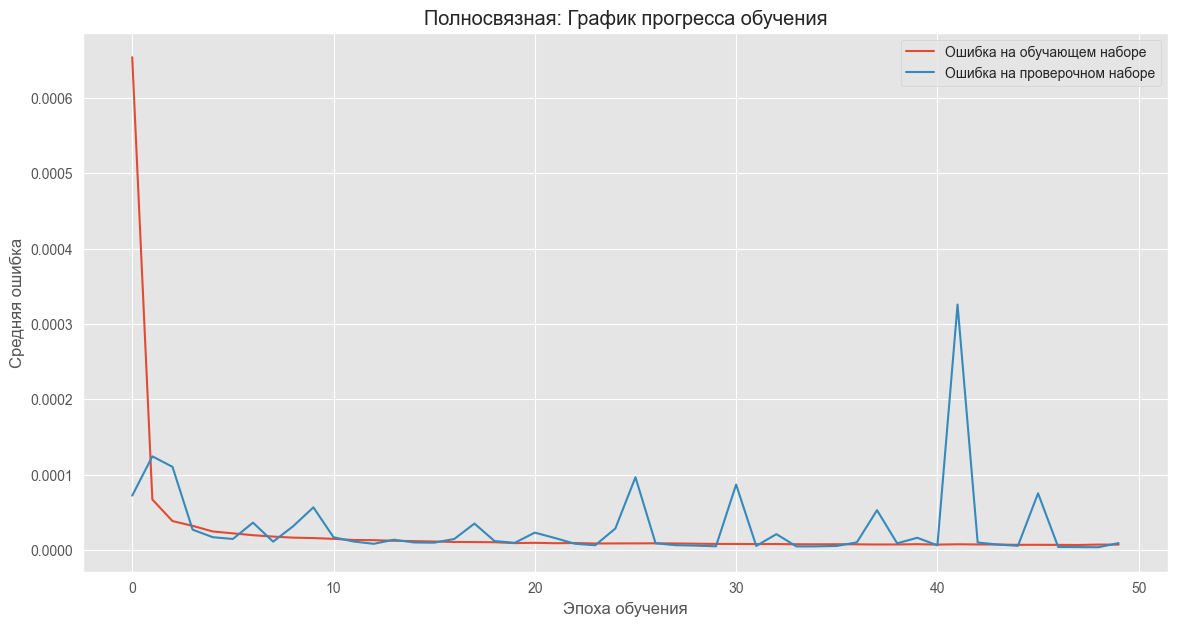

910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


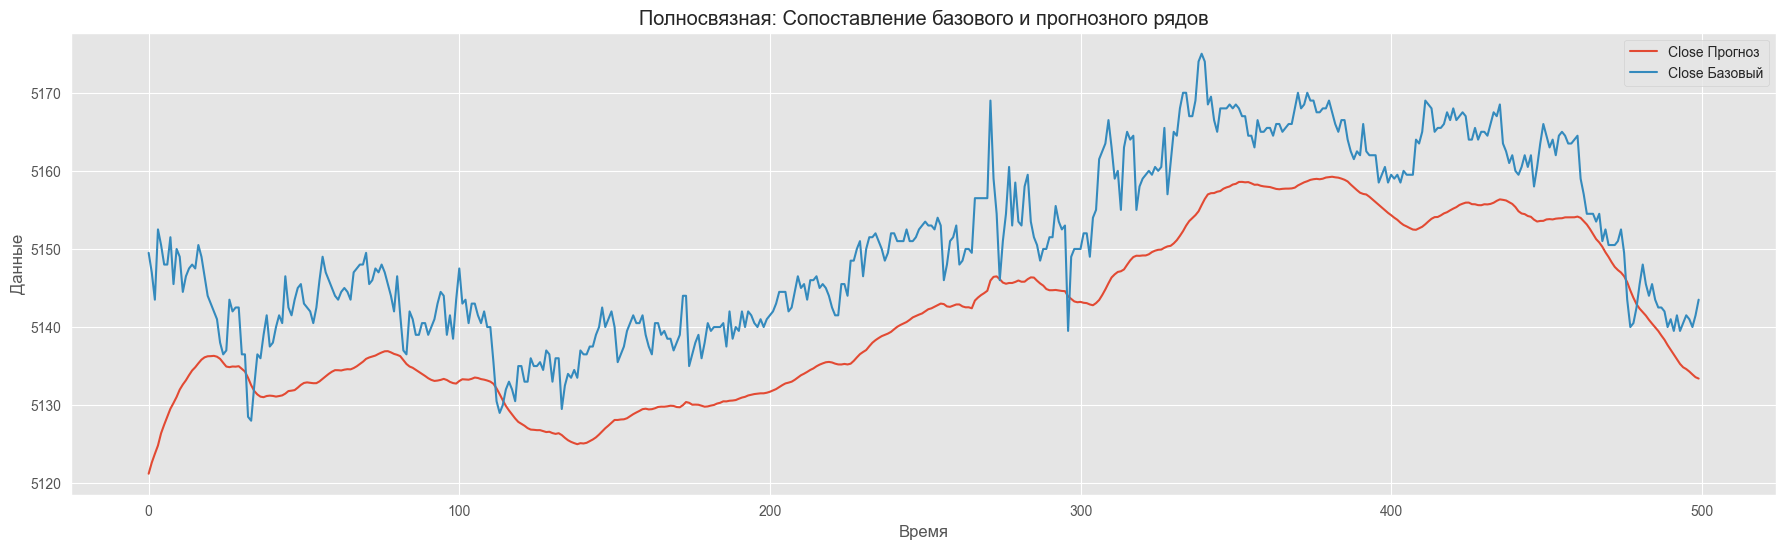

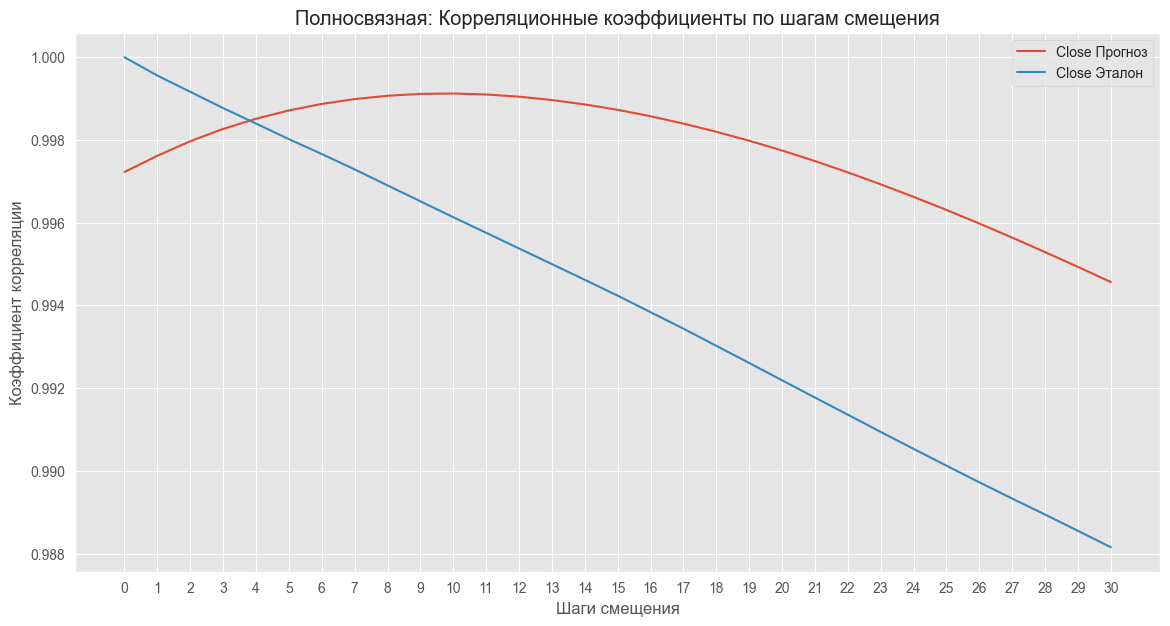

Обучение 50 эпох
Epoch 1/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 2.5857e-06 - val_loss: 3.6023e-06
Epoch 2/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 2.5804e-06 - val_loss: 4.8613e-06
Epoch 3/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 2.4621e-06 - val_loss: 3.9123e-06
Epoch 4/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - loss: 2.4251e-06 - val_loss: 3.9732e-06
Epoch 5/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - loss: 2.5336e-06 - val_loss: 3.4343e-06
Epoch 6/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - loss: 2.4453e-06 - val_loss: 3.5025e-06
Epoch 7/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - loss: 2.3954e-06 - val_loss: 3.6173e-06
Epoch 8/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - loss: 2.4510e-06 - val_loss: 3.7171e-06
Epoch 9/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - loss: 2.4445e-06 - val_loss: 3.5611e-06
Epoch 10/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - loss: 2.4886e-06 - val_loss: 5.4

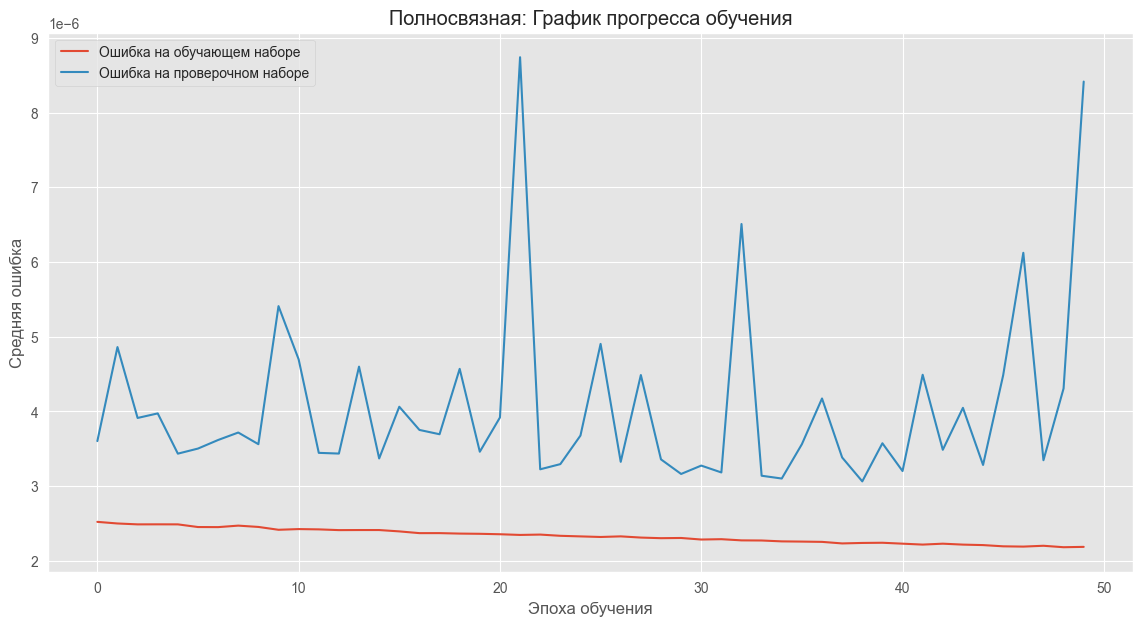

910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


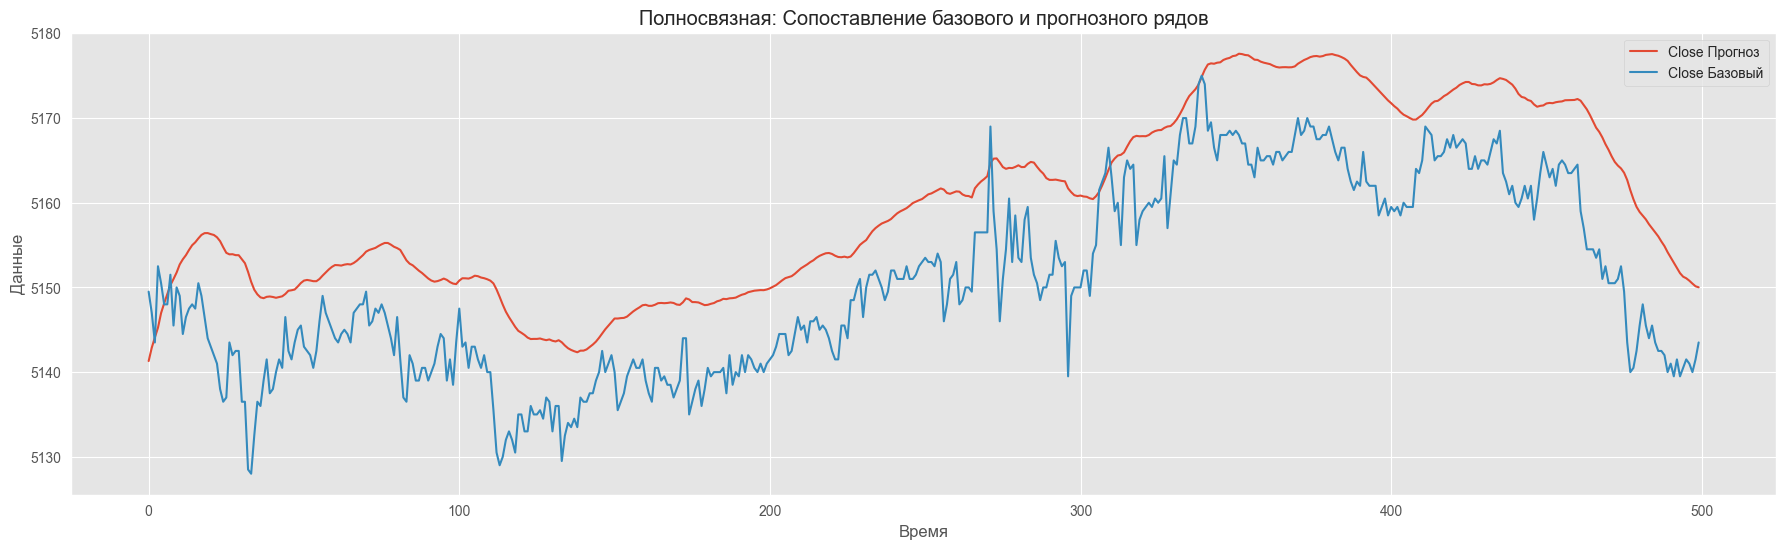

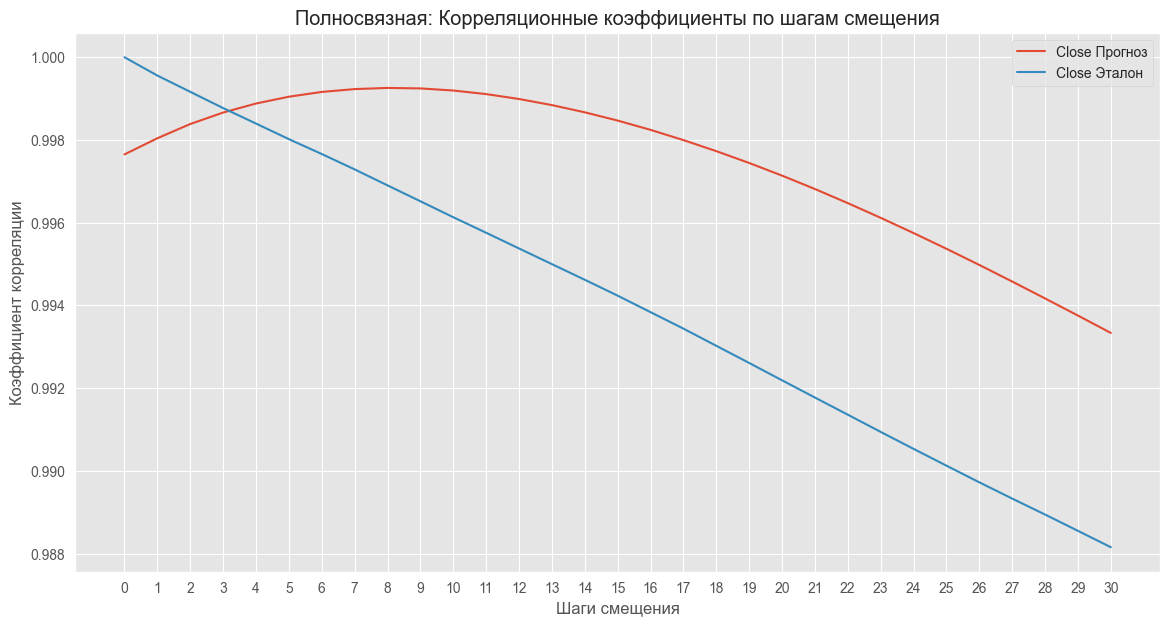

Обучение 50 эпох
Epoch 1/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 1.9873e-06 - val_loss: 2.9649e-06
Epoch 2/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 1.9672e-06 - val_loss: 2.9854e-06
Epoch 3/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 1.9246e-06 - val_loss: 3.0370e-06
Epoch 4/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 2.0294e-06 - val_loss: 2.9798e-06
Epoch 5/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 1.9155e-06 - val_loss: 2.9633e-06
Epoch 6/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 1.8982e-06 - val_loss: 2.9891e-06
Epoch 7/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 1.9386e-06 - val_loss: 2.9654e-06
Epoch 8/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 1.8693e-06 - val_loss: 2.9872e-06
Epoch 9/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - loss: 1.9145e-06 - val_loss: 2.9667e-06
Epoch 10/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - loss: 1.9350e-06 - val_loss: 3.0

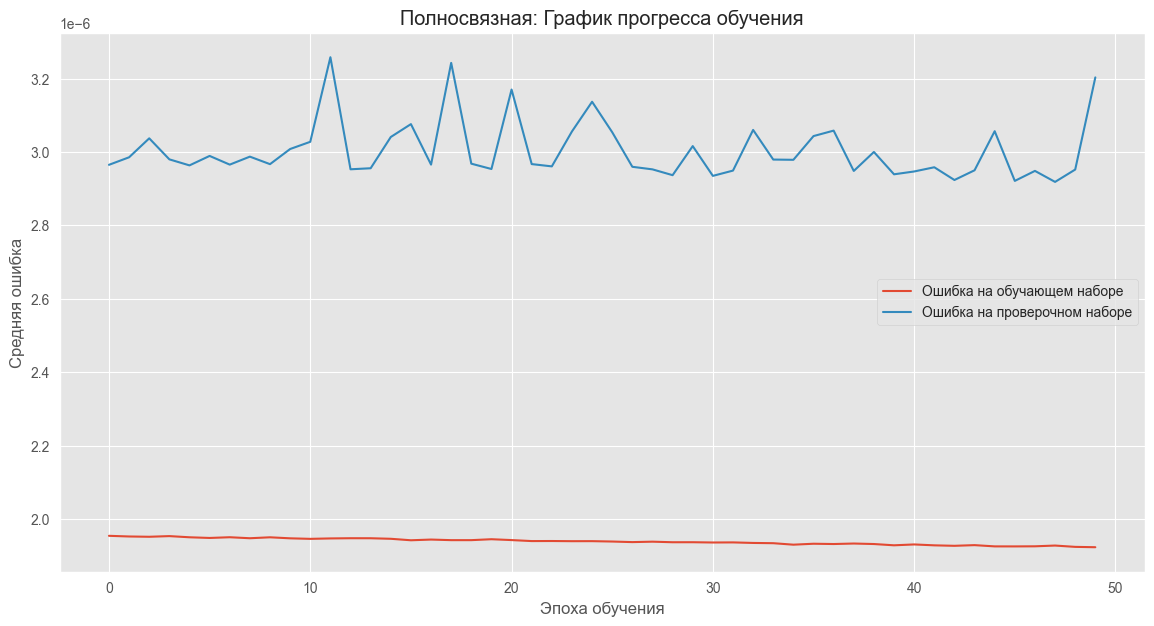

910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


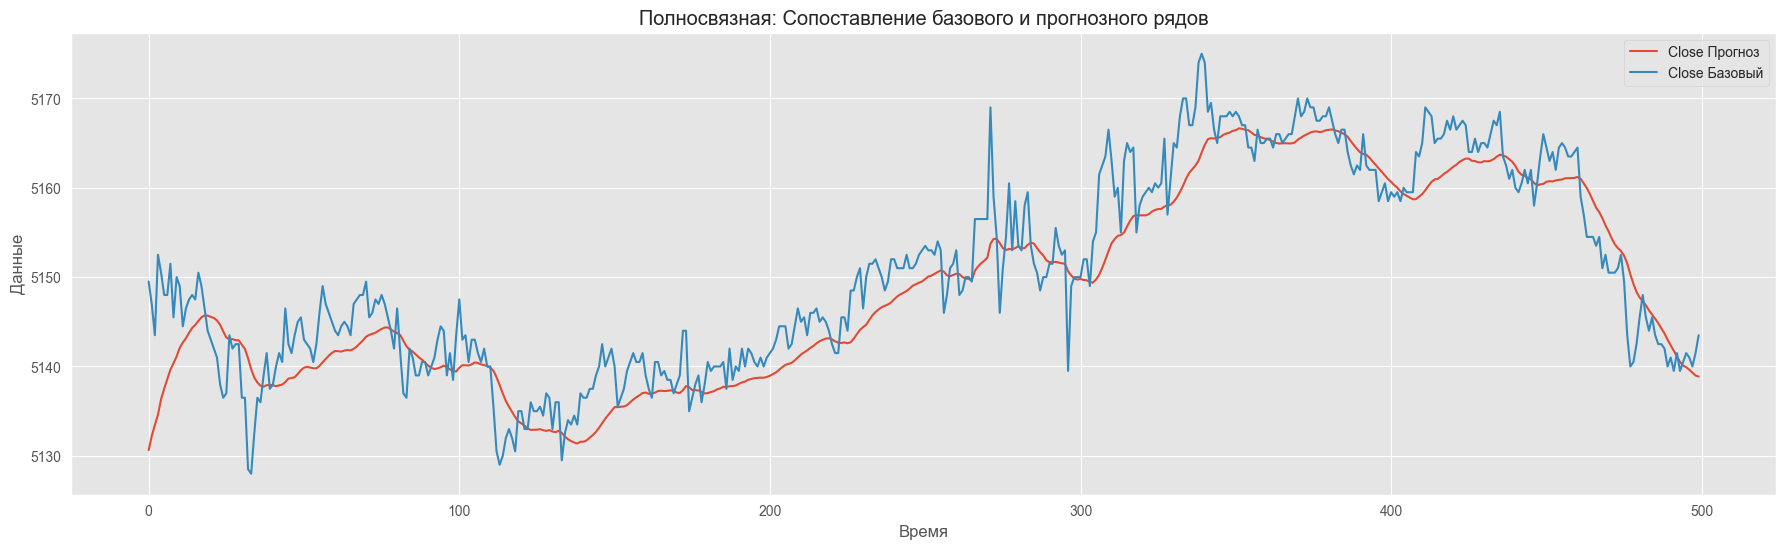

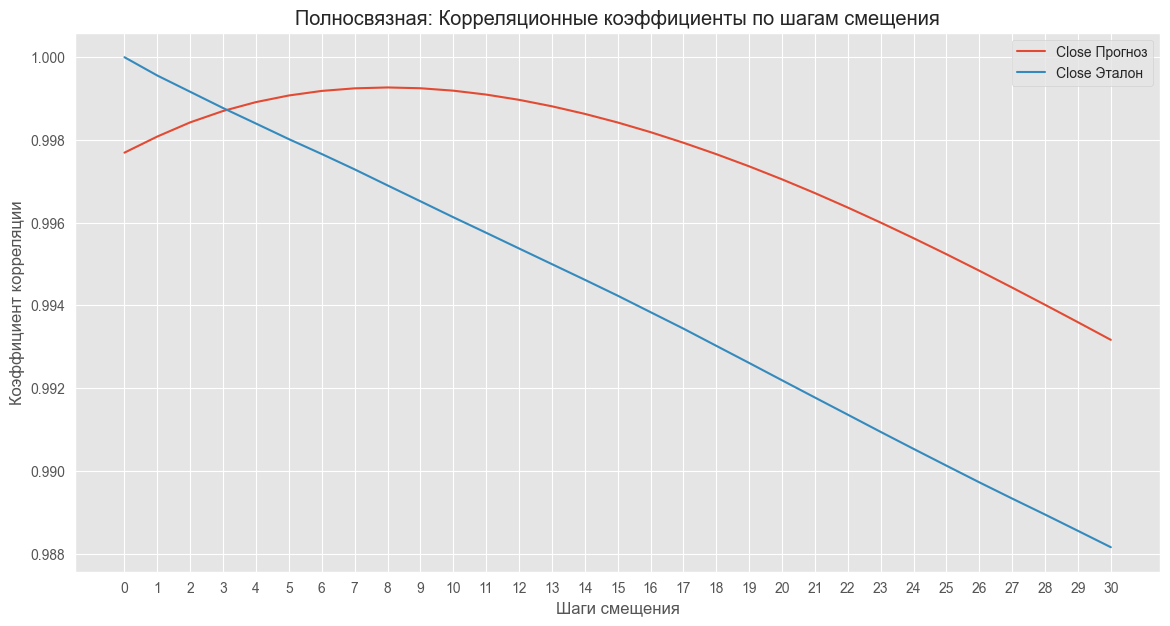

In [ ]:
# Простая полносвязная сеть
model_dense = Sequential()
model_dense.add(Dense(150, input_shape=x_test.shape[1:], activation='relu'))
model_dense.add(Flatten())
model_dense.add(Dense(y_test.shape[1], activation='linear'))

# Обучение модели 3x50 эпох
train_eval_net(model_dense, train_datagen, val_datagen, [(50, Adam(learning_rate=1e-4)),
(50, Adam(learning_rate=1e-5)),
(50, Adam(learning_rate=1e-6))],
               x_test, y_test, y_scaler, title='Полносвязная')

**Вывод:** даже при небольшом наборе параметров и простоте архитектуры, сеть достаточно точно предсказывает значение, но это значение не является вполне корректным, так как график автокорреляции показывает, что график предсказания и реального значения имеют зависимость, т.е. нейронка предсказывает то, что было несколько шагов назад.

#### Исследование №2

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 150)            │       225,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,301 (880.08 KB)

 Trainable params: 225,301 (880.08 KB)

 Non-trainable params: 0 (0.00 B)

Обучение 20 эпох
Epoch 1/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 0.0082 - val_loss: 0.0036
Epoch 2/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 0.0012 - val_loss: 2.7724e-04
Epoch 3/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 1.1285e-04 - val_loss: 2.2039e-04
Epoch 4/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - loss: 7.6133e-05 - val_loss: 2.3471e-04
Epoch 5/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 5.5424e-05 - val_loss: 1.3423e-05
Epoch 6/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 3.5425e-05 - val_loss: 2.7075e-05
Epoch 7/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - loss: 2.8581e-05 - val_loss: 1.8887e-05
Epoch 8/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 2.8767e-05 - val_loss: 5.7943e-05
Epoch 9/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - loss: 1.9203e-05 - val_loss: 2.9517e-04
Epoch 10/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 2.3738e-05 - val_loss: 1.7031e-05
Epoc

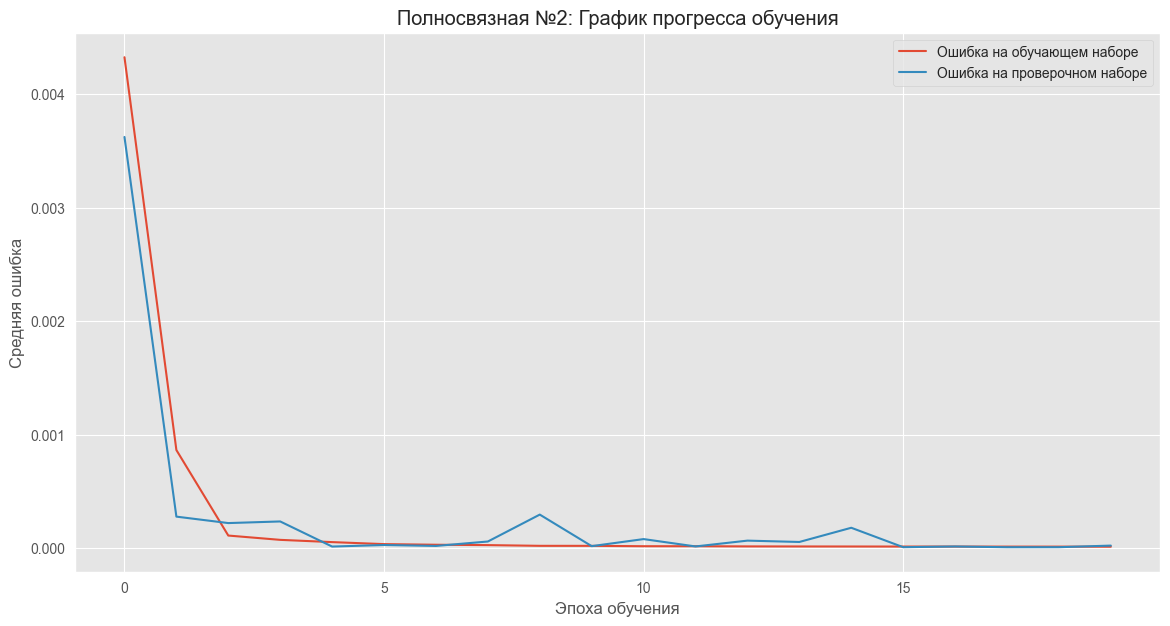

910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


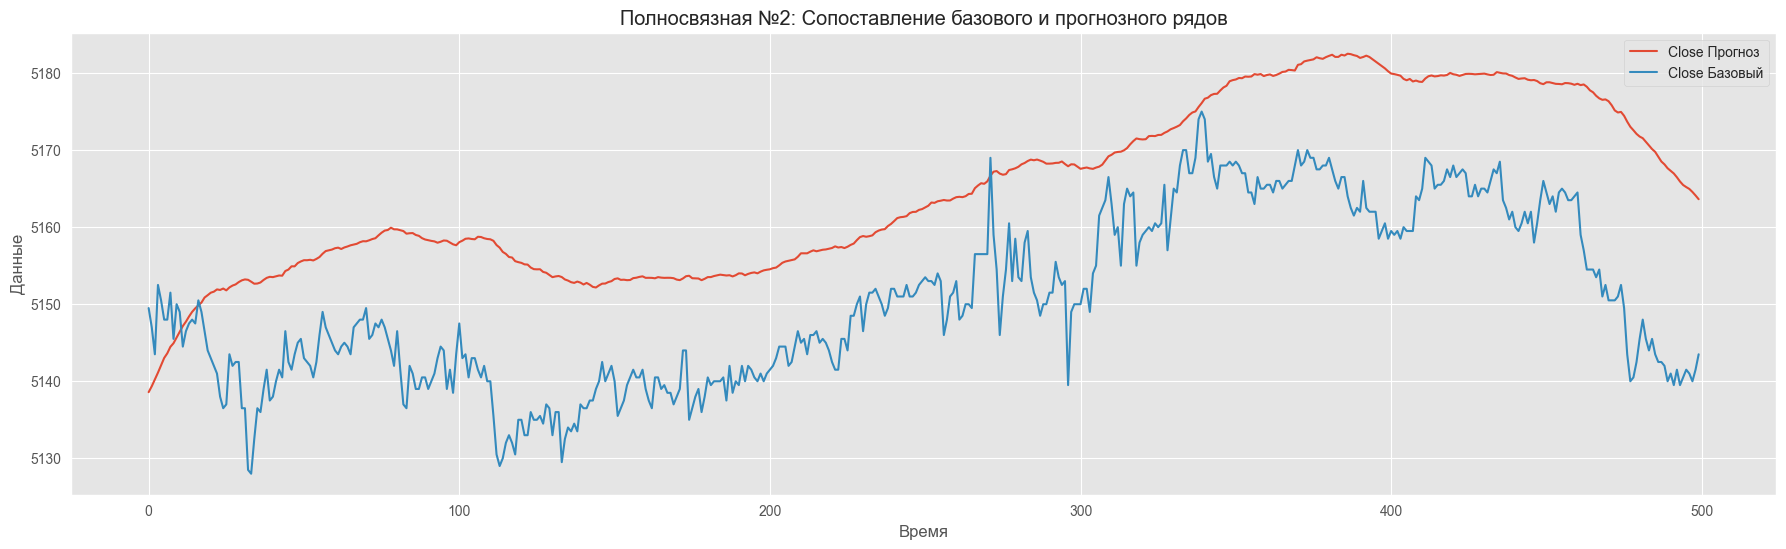

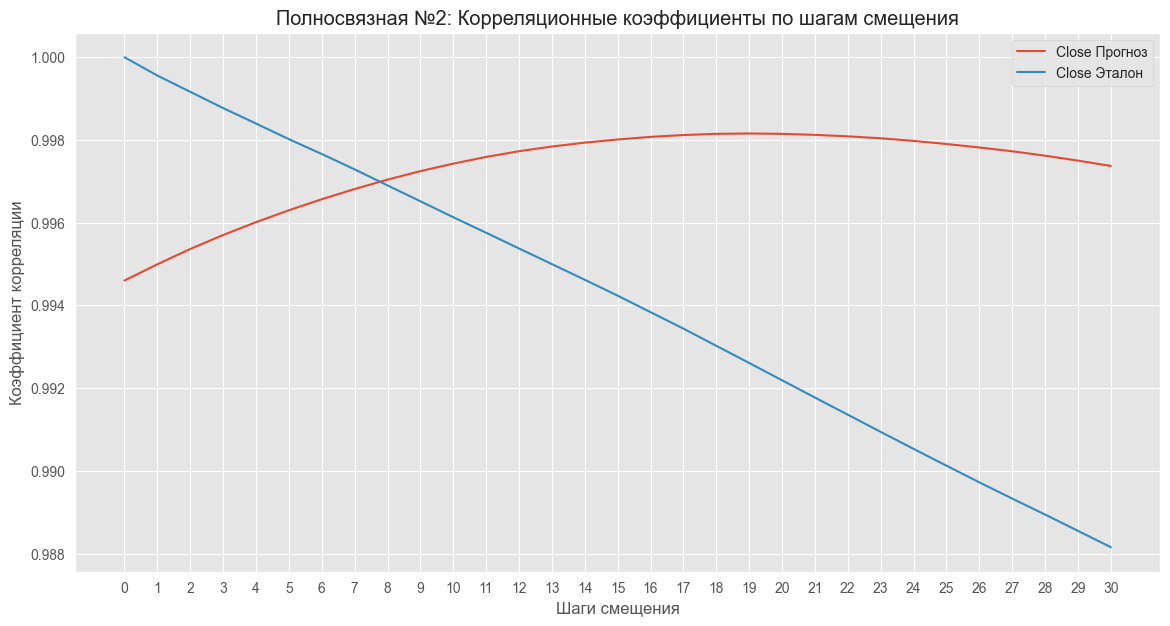

Обучение 20 эпох
Epoch 1/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 77s 3ms/step - loss: 4.8462e-06 - val_loss: 1.0509e-05
Epoch 2/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - loss: 4.5603e-06 - val_loss: 6.6637e-06
Epoch 3/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - loss: 4.5191e-06 - val_loss: 6.6087e-06
Epoch 4/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 4.5262e-06 - val_loss: 6.4249e-06
Epoch 5/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - loss: 4.5012e-06 - val_loss: 6.5623e-06
Epoch 6/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 4.6378e-06 - val_loss: 6.3534e-06
Epoch 7/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - loss: 4.8399e-06 - val_loss: 6.3472e-06
Epoch 8/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 4.3511e-06 - val_loss: 1.1011e-05
Epoch 9/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 4.4375e-06 - val_loss: 1.6798e-05
Epoch 10/20
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 4.5695e-06 - val_loss: 6.0

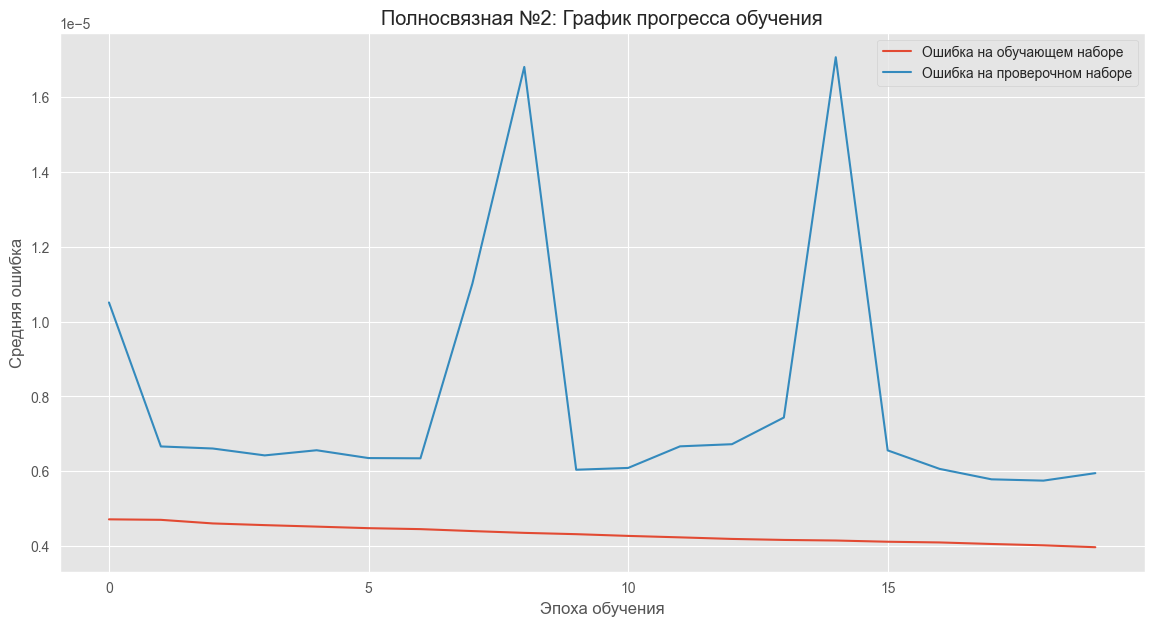

910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step


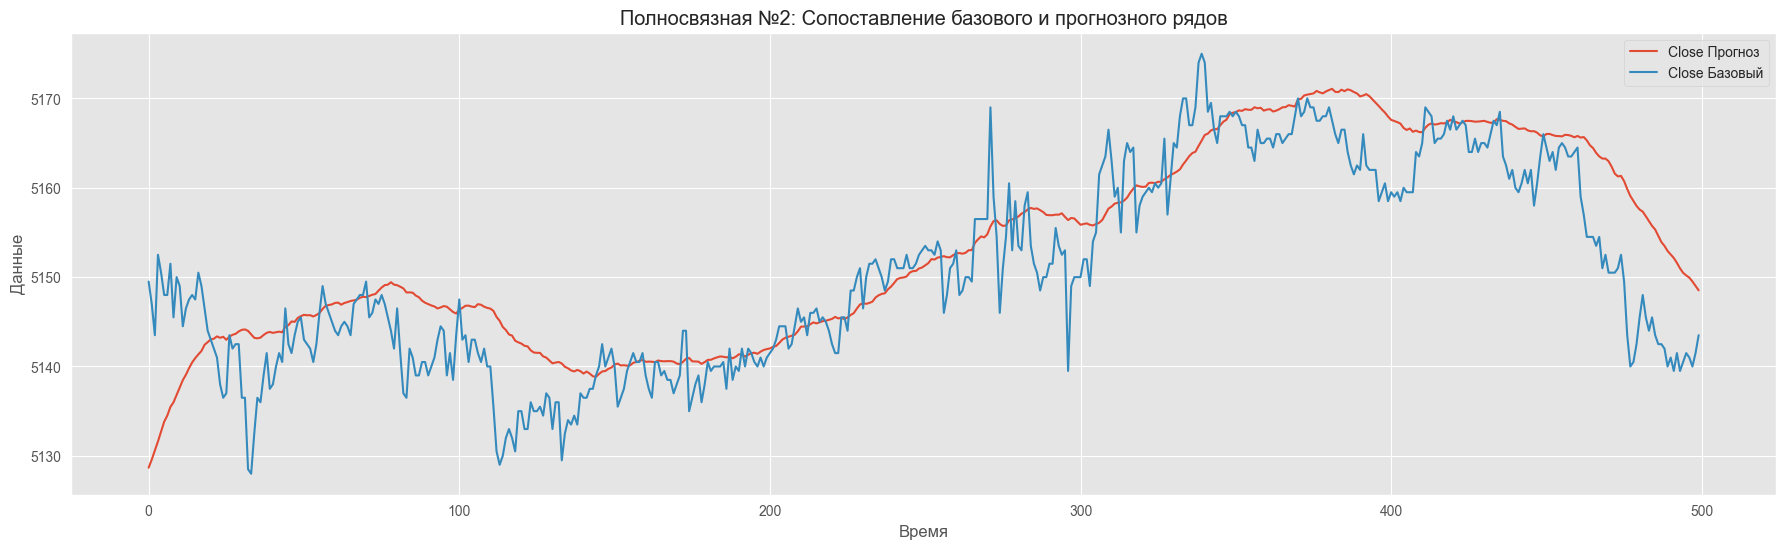

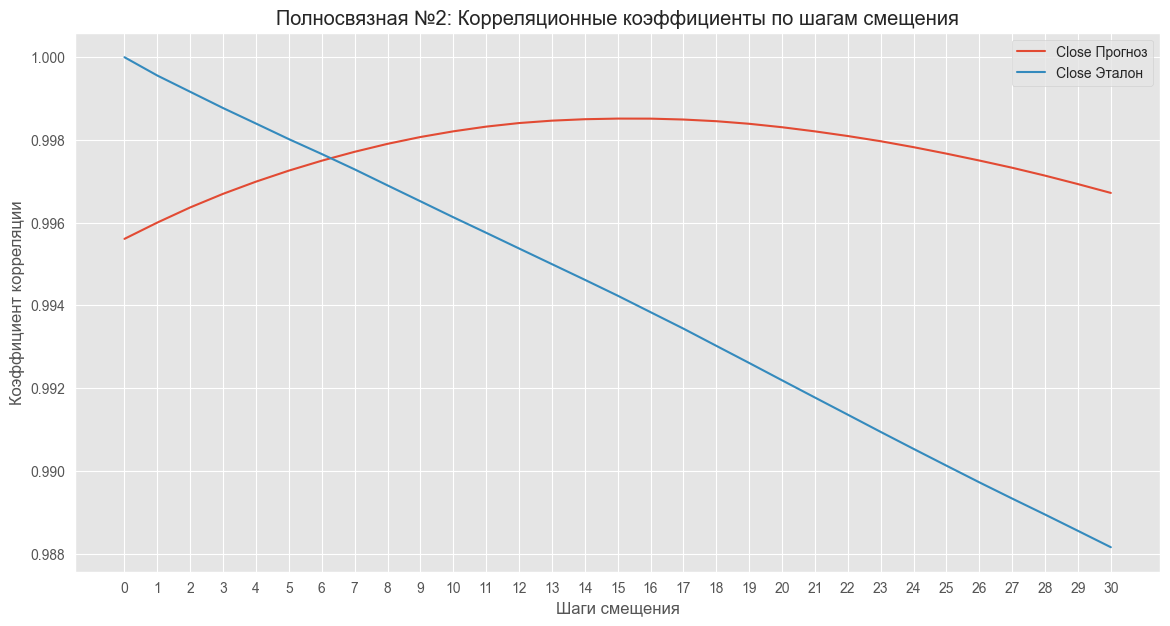

In [ ]:
# Полносвязная сеть с Flatten
model_dense_2 = Sequential()
model_dense_2.add(Flatten(input_shape=x_test.shape[1:]))
model_dense_2.add(Dense(150, activation='relu'))
model_dense_2.add(Dense(y_test.shape[1], activation='linear'))

# Обучение модели 2x20 эпох
train_eval_net(model_dense_2, train_datagen, val_datagen, [(20, Adam(learning_rate=1e-4)),
                                                           (20, Adam(learning_rate=1e-5))],
               x_test, y_test, y_scaler, title='Полносвязная №2')

**Вывод:** в этом случае мы сначала данные развернули в вектор и затем обрабатывали сетью. Так как мы ушли от исходной структуры данных, немного снизилась точность и увеличилась автокорреляция.

### Одномерная свёртка



#### Исследование №1

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 296, 64)        │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 292, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 146, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9344)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │       934,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 956,809 (3.65 MB)

 Trainable params: 956,809 (3.65 MB)

 Non-trainable params: 0 (0.00 B)

Обучение 50 эпох
Epoch 1/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 165s 7ms/step - loss: 9.8473e-04 - val_loss: 8.7217e-04
Epoch 2/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 172s 8ms/step - loss: 8.2180e-05 - val_loss: 9.9920e-05
Epoch 3/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 168s 7ms/step - loss: 4.5387e-05 - val_loss: 1.2148e-04
Epoch 4/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 169s 7ms/step - loss: 3.9959e-05 - val_loss: 1.4752e-05
Epoch 5/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 169s 7ms/step - loss: 3.5713e-05 - val_loss: 5.6266e-05
Epoch 6/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 170s 8ms/step - loss: 3.2940e-05 - val_loss: 2.6089e-04
Epoch 7/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 169s 8ms/step - loss: 3.2549e-05 - val_loss: 1.2322e-05
Epoch 8/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 172s 8ms/step - loss: 2.8139e-05 - val_loss: 1.6048e-05
Epoch 9/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 172s 8ms/step - loss: 2.6049e-05 - val_loss: 4.2834e-05
Epoch 10/50
22579/22579 ━━━━━━━━━━━━━━━━━━━━ 172s 8ms/step - loss: 2.5449e-05 - val

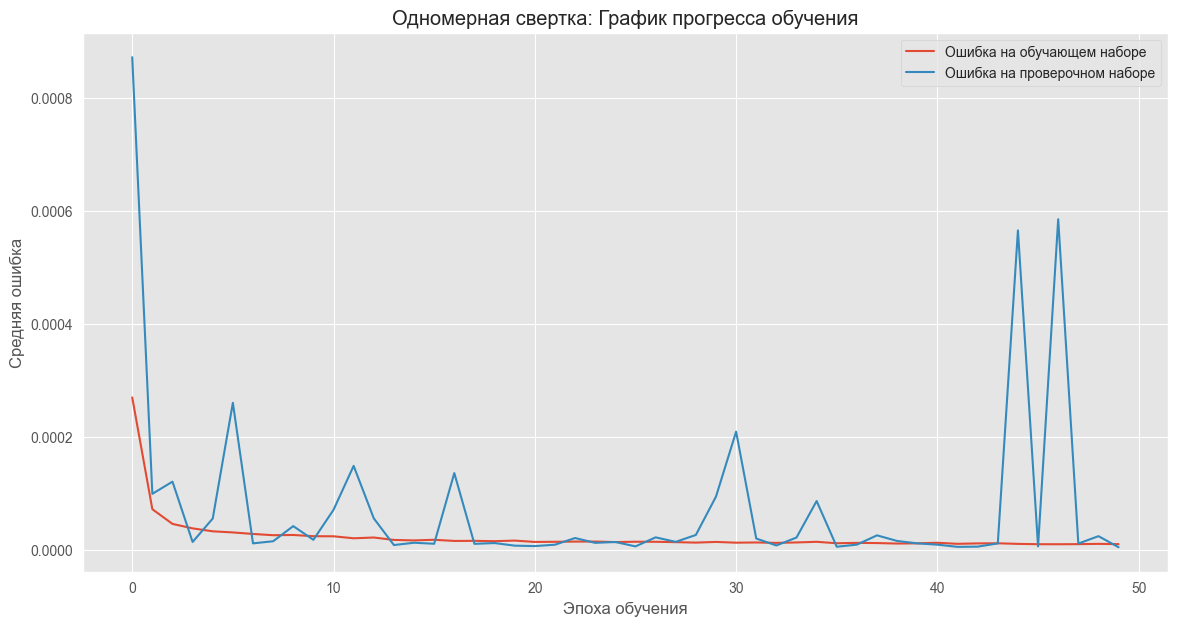

910/910 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


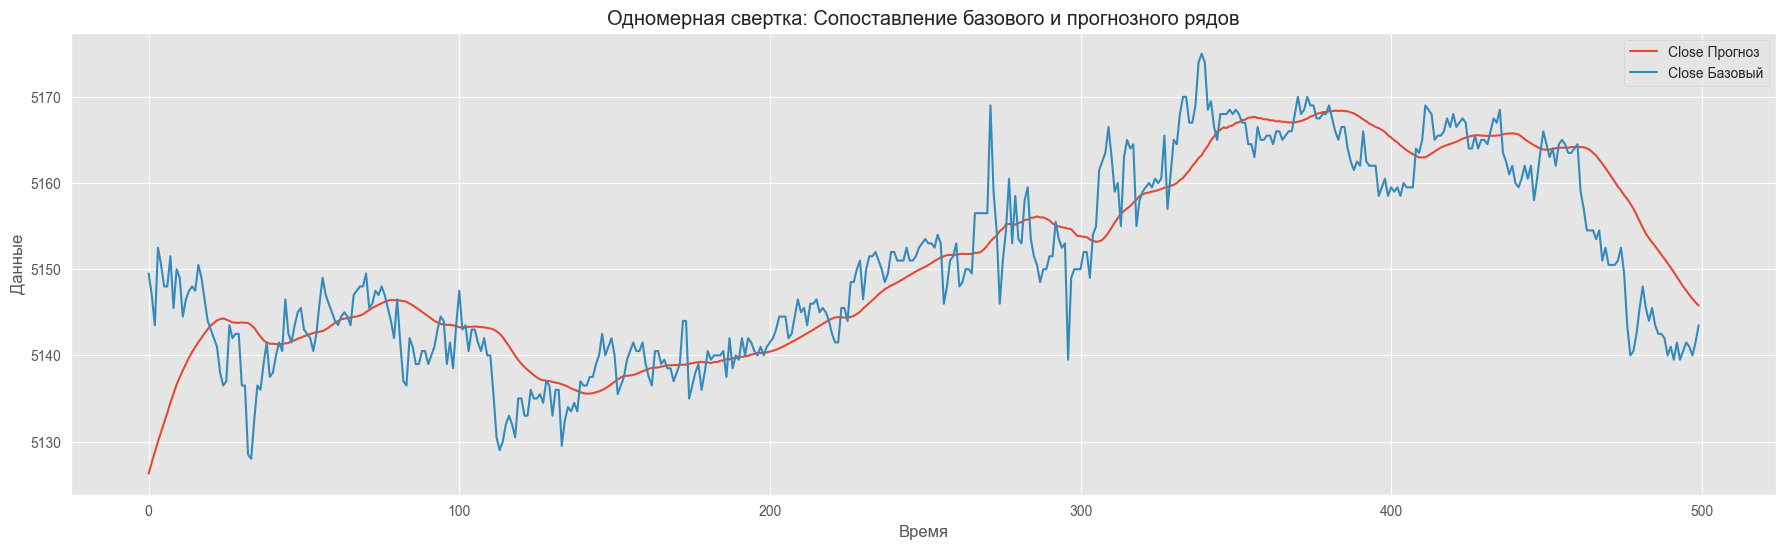

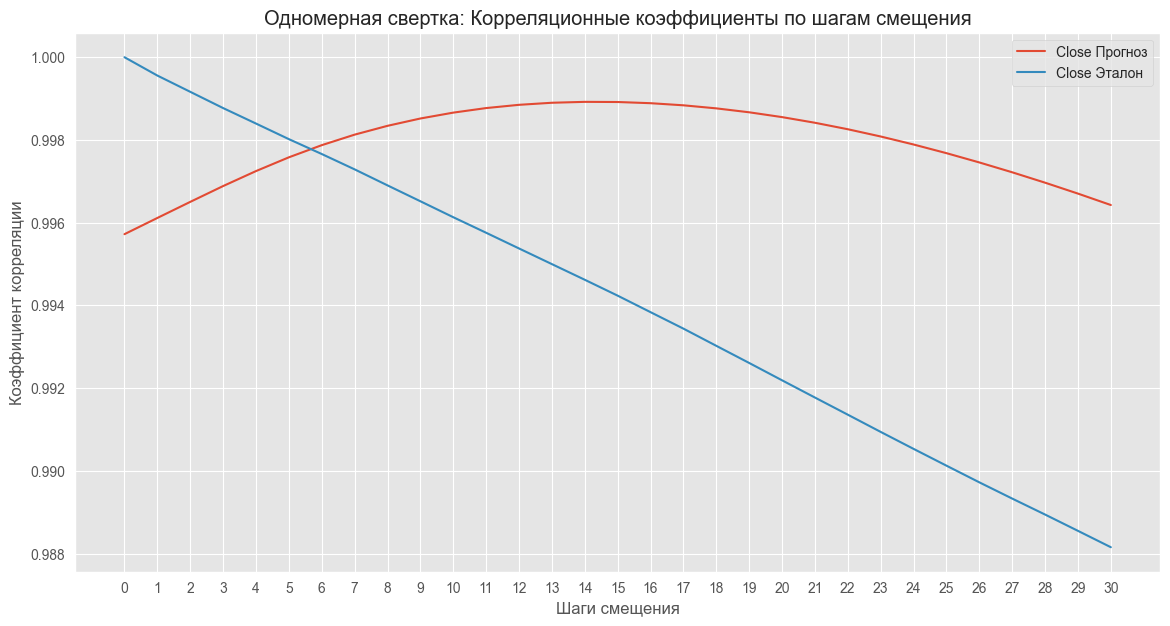

Обучение 20 эпох
Epoch 1/20
 2616/22579 ━━━━━━━━━━━━━━━━━━━━ 3:35 11ms/step - loss: 3.3158e-06

In [ ]:
# Модель с одномерной сверткой
model_conv = Sequential()
model_conv.add(Conv1D(64, 5, input_shape=x_test.shape[1:], activation='relu'))
model_conv.add(Conv1D(64, 5, activation='relu'))
model_conv.add(MaxPooling1D())
model_conv.add(Flatten())
model_conv.add(Dense(100, activation='relu'))
model_conv.add(Dense(y_test.shape[1], activation='linear'))

# Обучение модели 50+20 эпох
train_eval_net(model_conv, train_datagen, val_datagen, [(50, Adam(learning_rate=1e-4)),
                                                        (20, Adam(learning_rate=1e-5))],
               x_test, y_test, y_scaler, title='Одномерная свертка')

**Вывод:** несмотря на то, что мы использовали сверточные слои и более сложную архитектуру, это не принесло результата, точность осталась почти на том же уровне. Но это не говорит о том, что свертки неэффективны для анализа временных рядов, стоит ещё поэкспериментировать с архитектурой.

#### Исследование №2

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 296, 50)           1300      
_________________________________________________________________
flatten_3 (Flatten)          (None, 14800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                148010    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 149,321
Trainable params: 149,321
Non-trainable params: 0
_________________________________________________________________
Обучение 20 эпох
Epoch 1/20
22579/22579 [==============================] - 50s 2ms/step - loss: 0.0040 - val_loss: 1.2794e-04
Epoch 2/20
22579/22579 [==============================] - 50s 2ms/step - loss: 2.5112e-04 - val_loss: 2.1821e-05
Epoch 3

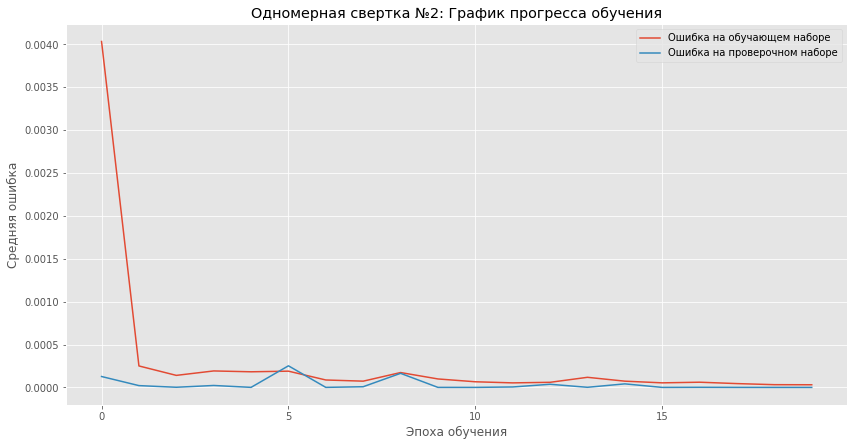

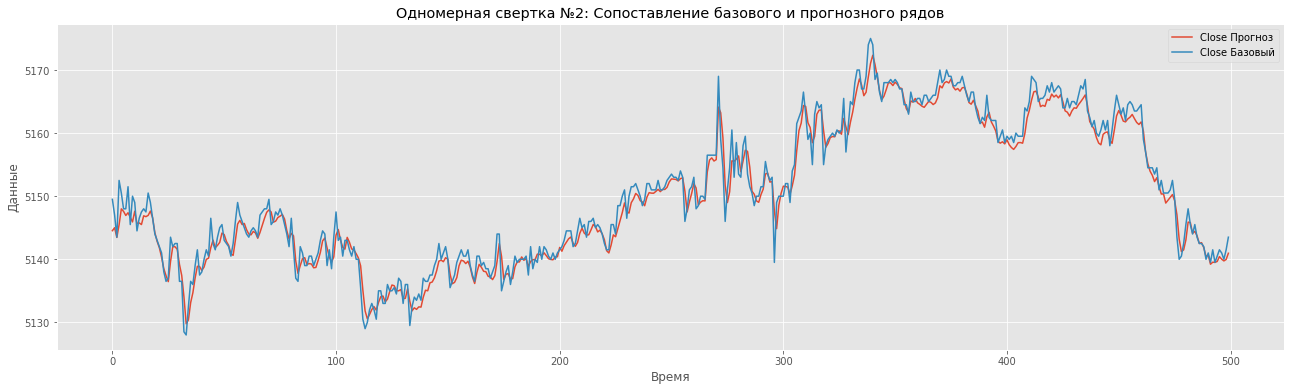

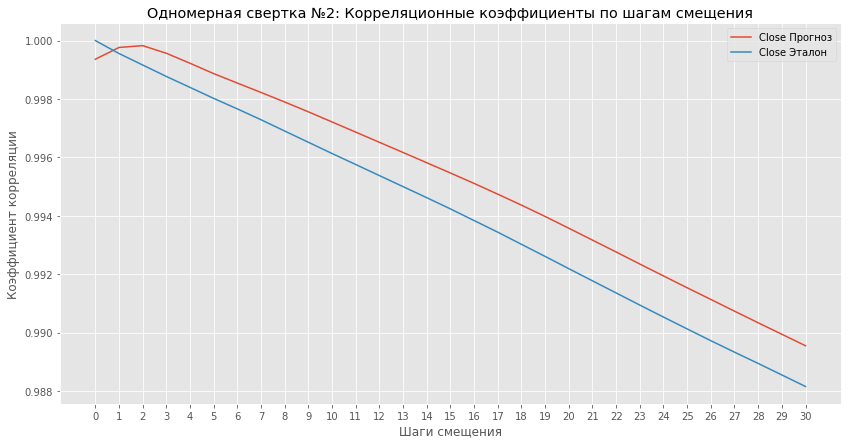

Обучение 20 эпох
Epoch 1/20
22579/22579 [==============================] - 51s 2ms/step - loss: 8.8142e-07 - val_loss: 8.1802e-07
Epoch 2/20
22579/22579 [==============================] - 51s 2ms/step - loss: 7.7319e-07 - val_loss: 6.7572e-07
Epoch 3/20
22579/22579 [==============================] - 51s 2ms/step - loss: 7.5530e-07 - val_loss: 7.4786e-07
Epoch 4/20
22579/22579 [==============================] - 51s 2ms/step - loss: 7.2835e-07 - val_loss: 6.7067e-07
Epoch 5/20
22579/22579 [==============================] - 50s 2ms/step - loss: 7.0005e-07 - val_loss: 6.7514e-07
Epoch 6/20
22579/22579 [==============================] - 50s 2ms/step - loss: 7.0537e-07 - val_loss: 6.4174e-07
Epoch 7/20
22579/22579 [==============================] - 51s 2ms/step - loss: 6.9544e-07 - val_loss: 9.9923e-07
Epoch 8/20
22579/22579 [==============================] - 50s 2ms/step - loss: 6.7778e-07 - val_loss: 5.9520e-06
Epoch 9/20
22579/22579 [==============================] - 51s 2ms/step - loss: 

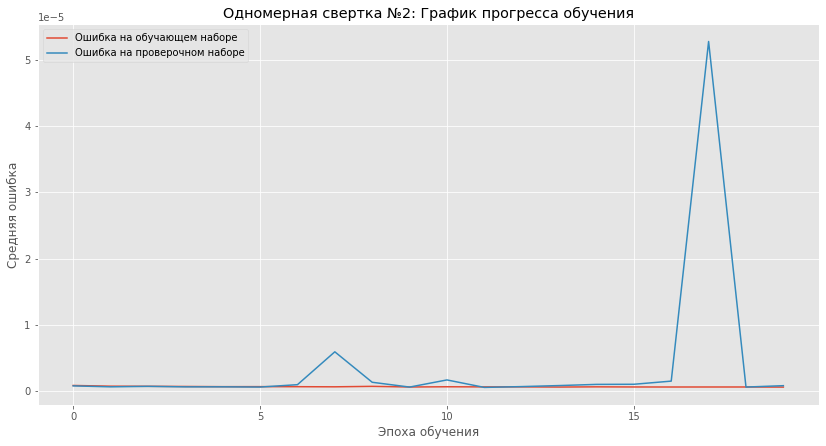

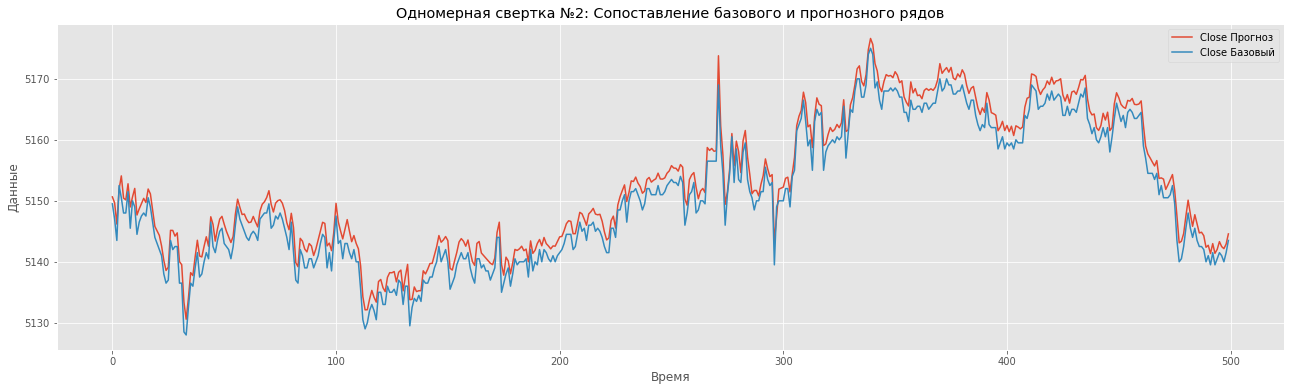

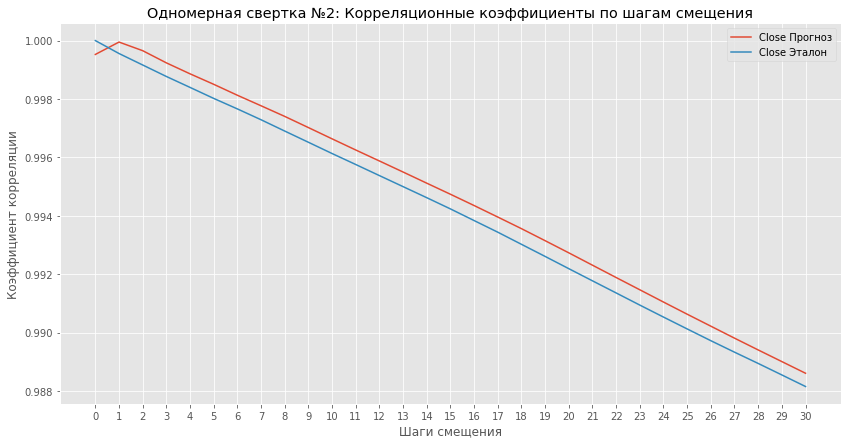

In [ ]:
# Упрощенная модель с одномерной сверткой
model_conv_2 = Sequential()
model_conv_2.add(Conv1D(50, 5, input_shape=x_test.shape[1:], activation='linear'))
model_conv_2.add(Flatten())
model_conv_2.add(Dense(10, activation='linear'))
model_conv_2.add(Dense(y_test.shape[1], activation='linear'))

# Обучение модели 2x20 эпох
train_eval_net(model_conv_2, train_datagen, val_datagen, [(20, Adam(learning_rate=1e-4)),
                                                          (20, Adam(learning_rate=1e-5))],
               x_test, y_test, y_scaler, title='Одномерная свертка №2')

Обратите, пожалуйста, внимание на то, что “холмик” на графике корреляции в районе первых двух шагов говорит о наличии эффекта автокорреляции. В идеале “холмика” быть не должно, а график предсказания должен быть как можно ближе к эталонному.


### Рекуррентная сеть (LSTM)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 220       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________
Обучение 20 эпох
Epoch 1/20
22579/22579 [==============================] - 220s 10ms/step - loss: 0.0278 - val_loss: 8.8373e-04
Epoch 2/20
22579/22579 [==============================] - 220s 10ms/step - loss: 3.5198e-04 - val_loss: 3.9401e-05
Epoch 3/20
22579/22579 [==============================] - 219s 10ms/step - loss: 3.0073e-05 - val_loss: 7.0937e-06
Epoch 4/20
22579/22579 [====

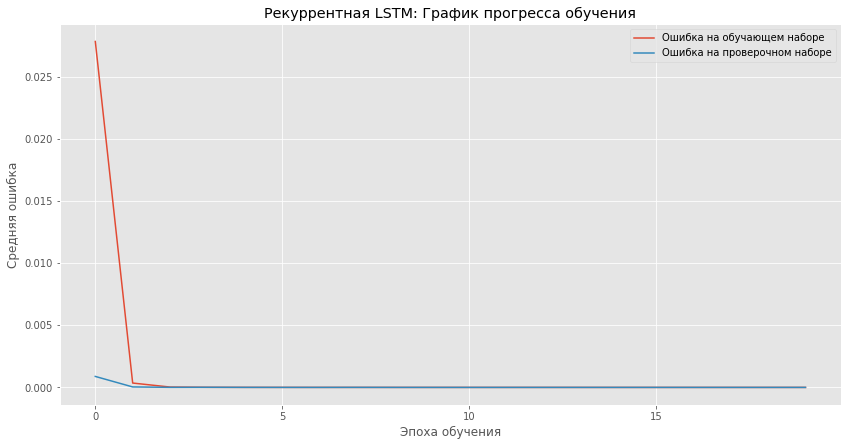

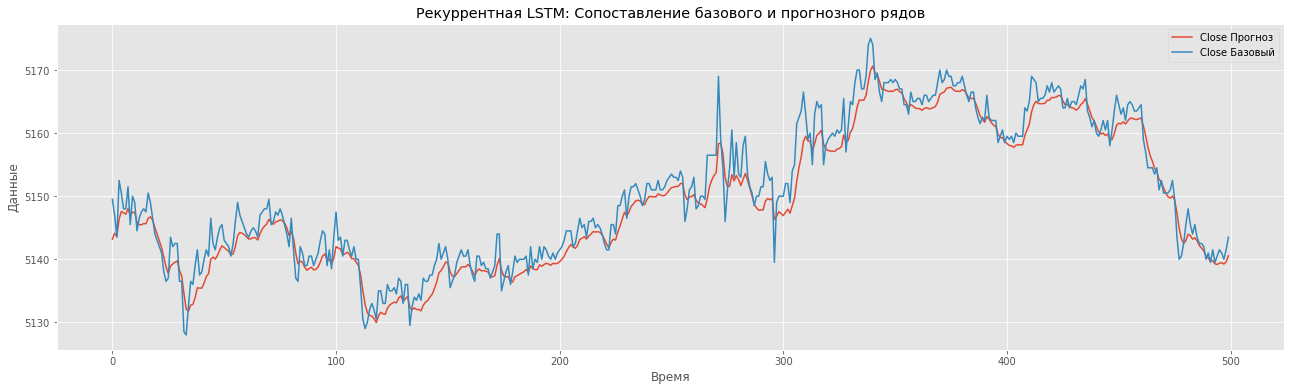

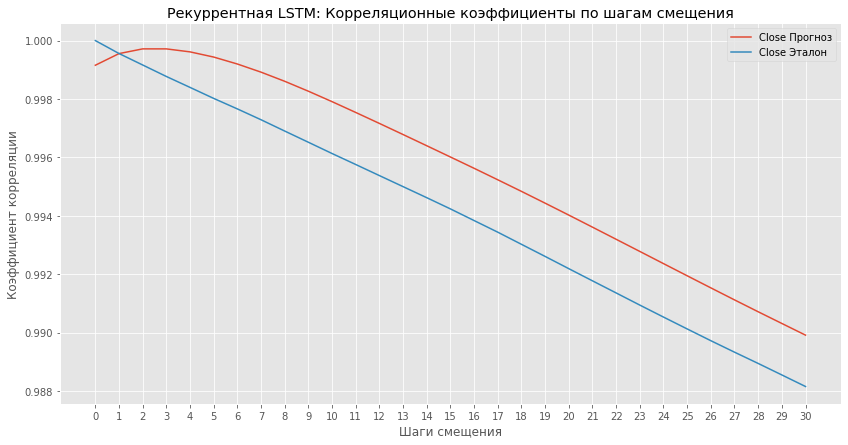

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(5, input_shape=x_test.shape[1:]))
model_lstm.add(Dense(10, activation='relu'))
model_lstm.add(Dense(y_test.shape[1], activation='linear'))

# Обучение модели 20 эпох
train_eval_net(model_lstm, train_datagen, val_datagen, [(20, Adam(learning_rate=1e-5))],
               x_test, y_test, y_scaler, title='Рекуррентная LSTM')

**Вывод**: LSTM-слой является очень тонким инструментом и его применение приносит результат только при тщательной настройке и комбинировании с другими слоями. В данном случае результат значительно хуже сверточной сети.

**Содержание темы**

1. [Теория](https://colab.research.google.com/drive/1i7yg4JvtG_L24T_2VPVTTWlXWrRdgvqQ?usp=sharing)

2. Практический ноутбук 1

3. [Практический ноутбук 2](https://colab.research.google.com/drive/1xnH8OUXgWk9D2zAZsLMAjxsQx8ejmrsz?usp=sharing)
